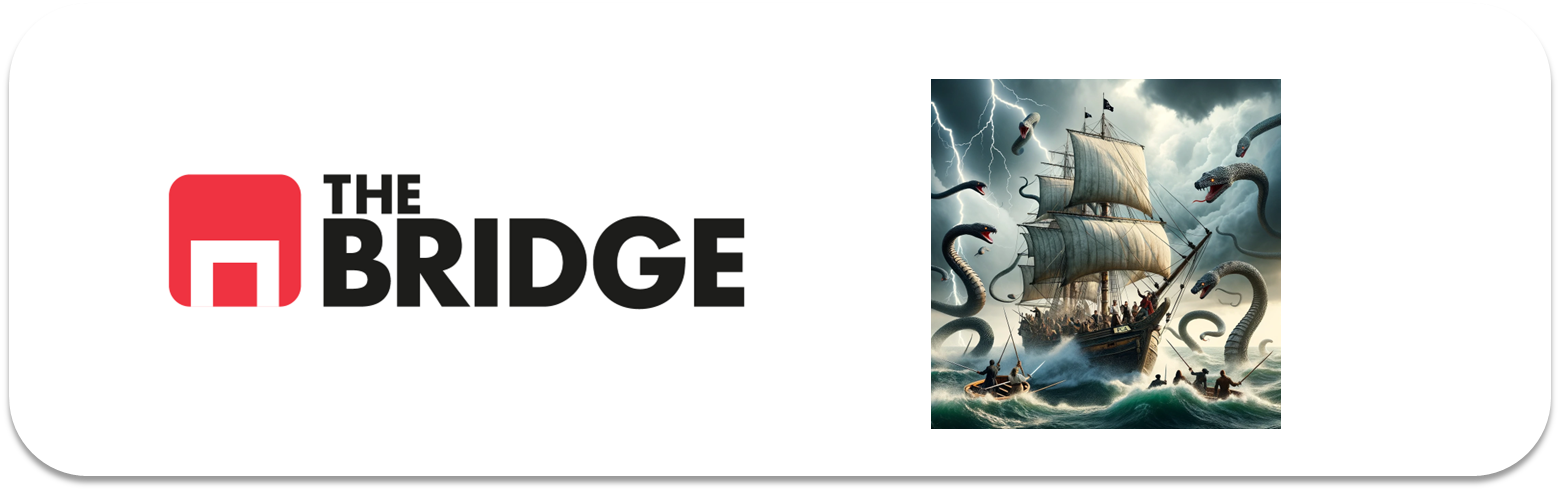

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import viztools as viz

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selección de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


<Figure size 1000x1000 with 0 Axes>

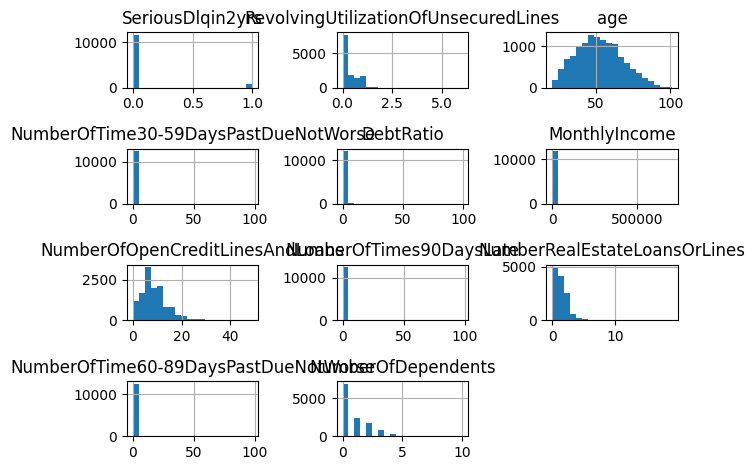

In [5]:
plt.figure(figsize=(10,10))
df.hist(bins=20)
plt.tight_layout()
plt.show()

---
1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.
---

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
featuresConversion = [col for col in df.columns if 'NumberOf' in col]
featuresConversion.append('NumberRealEstateLoansOrLines')

In [8]:
df = df.dropna()

In [9]:
for col in featuresConversion:
    df[col] = pd.cut(df[col], bins=[-1, 0, 1, 2, float('inf')], labels = [0, 1, 2, 3])

---
---

1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.


In [10]:
target = 'SeriousDlqin2yrs'

In [11]:
catFeatures = featuresConversion
numFeatures = [col for col in df.columns if col not in catFeatures]

In [12]:
catFeatures

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

In [13]:
numFeatures

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome']

---

In [14]:
target = 'SeriousDlqin2yrs'

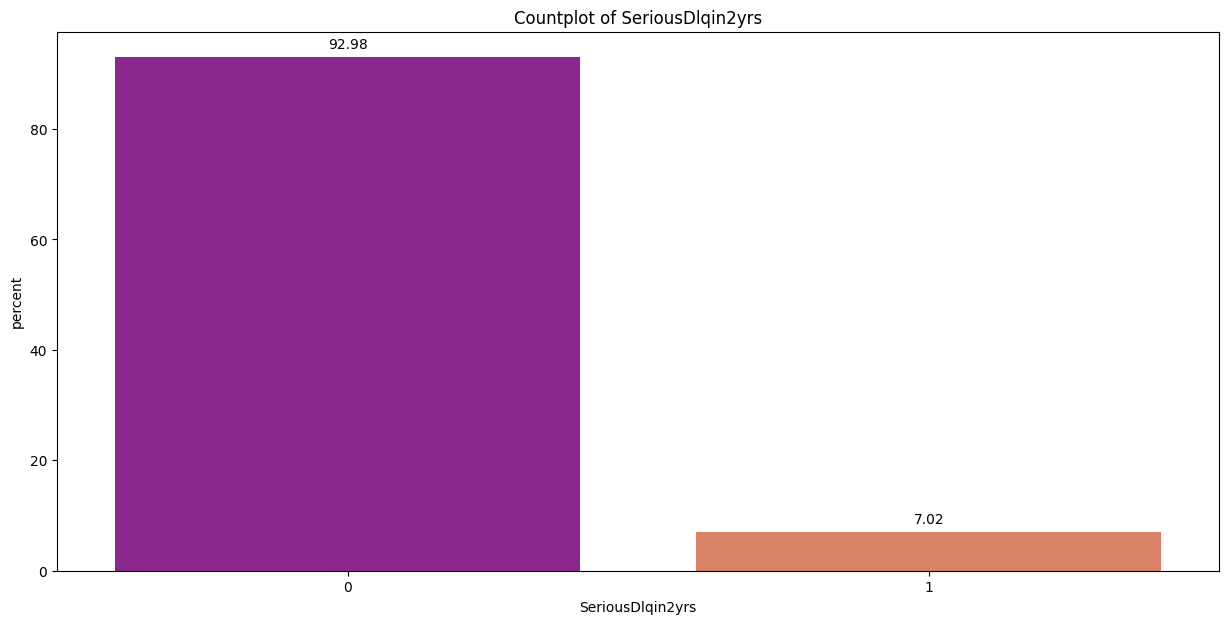

In [15]:
viz.countplot(df, target, stat='percent', show_vals=True)

---
# Cat Features

NumberOfTime30-59DaysPastDueNotWorse


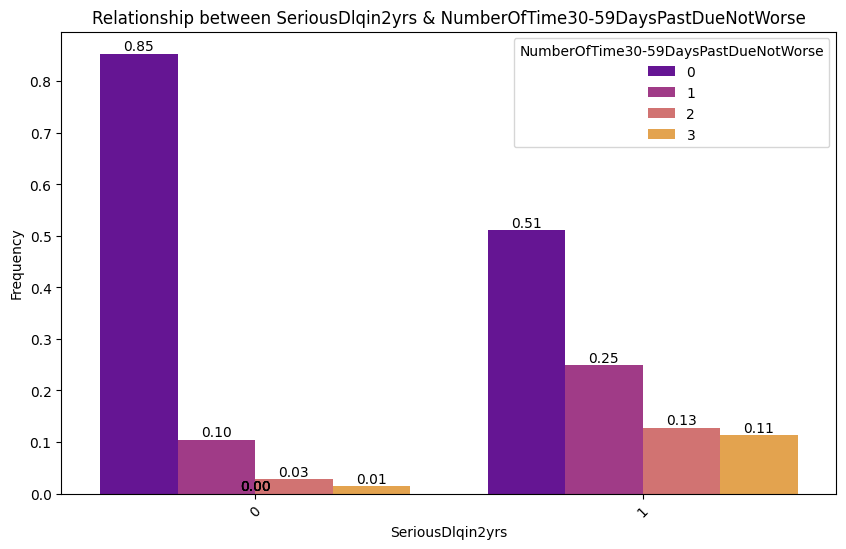

NumberOfOpenCreditLinesAndLoans


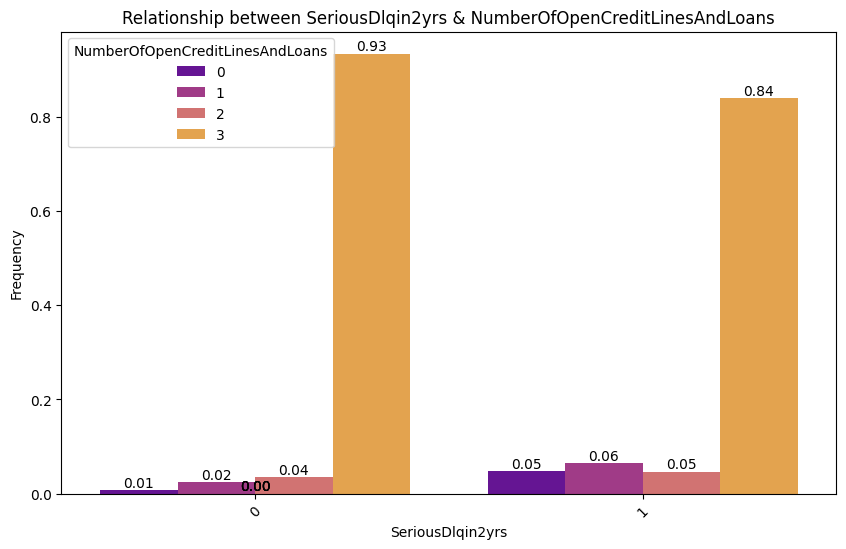

NumberOfTimes90DaysLate


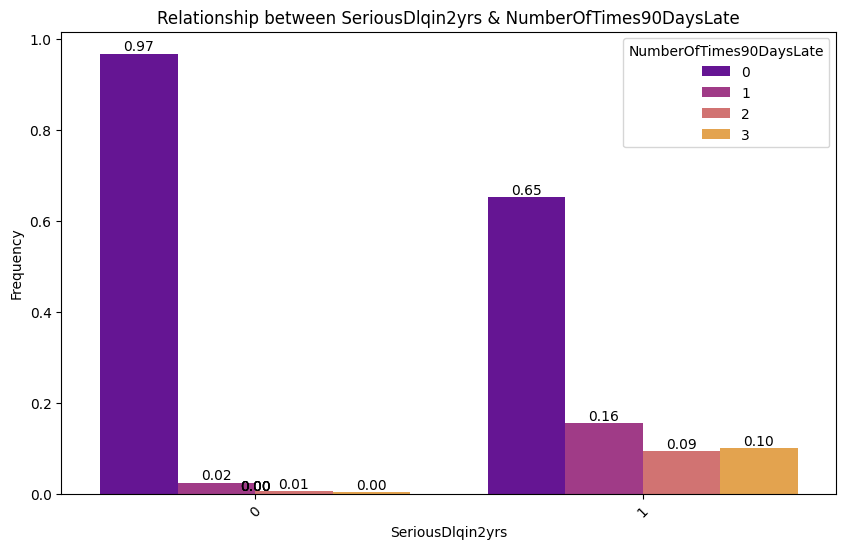

NumberOfTime60-89DaysPastDueNotWorse


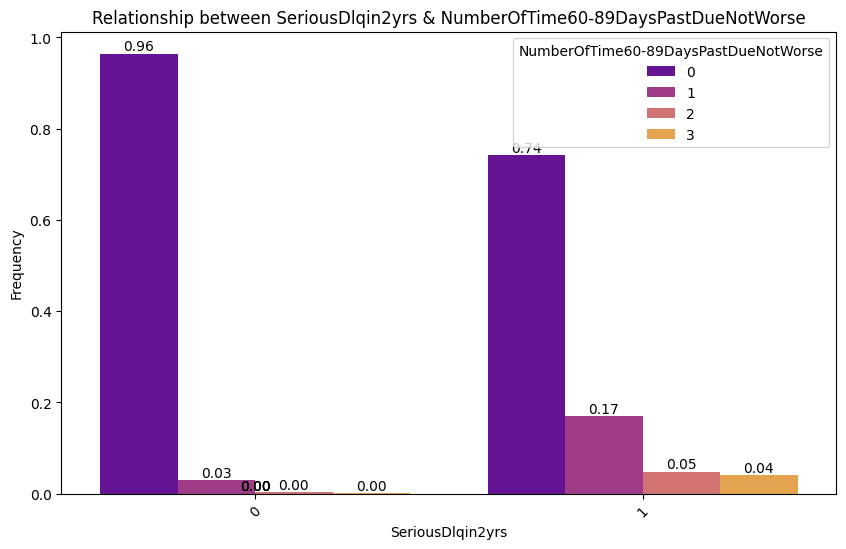

NumberOfDependents


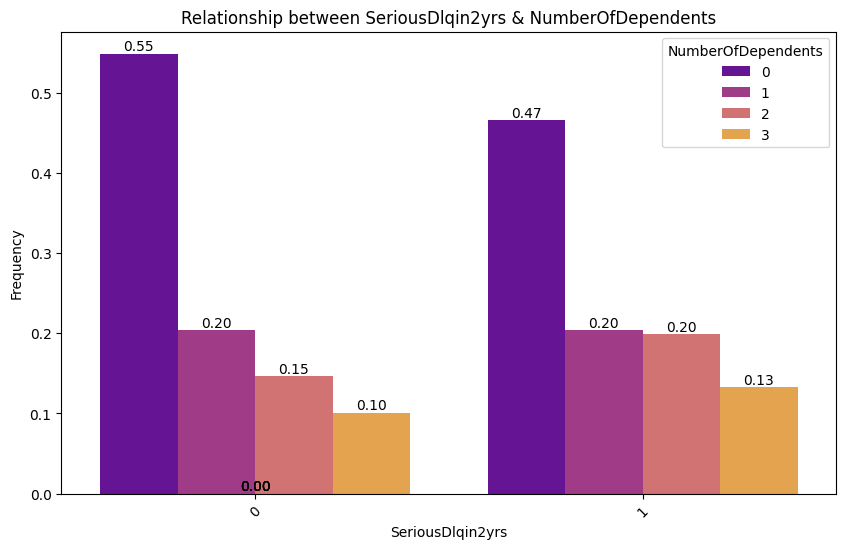

NumberRealEstateLoansOrLines


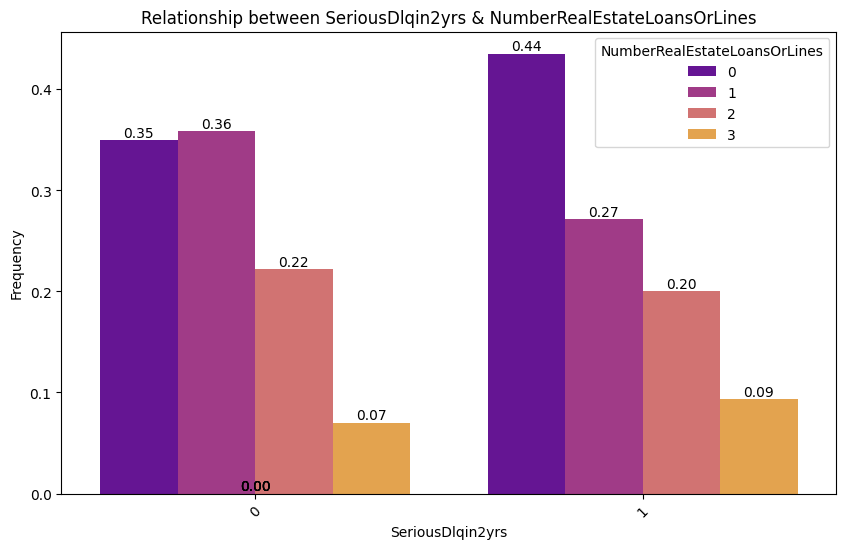

In [17]:
for col in catFeatures:
    print(col)
    viz.categorical_relationships(df, cat_col1=target, cat_col2=col, relative_freq=True, show_values=True)

#### **`NumberOfTime30-59DaysPastDueNotWorse`**
- Significant changes in distributions of classes in relation to target classes
- add to 'selectedVisually1'

#### **`NumberOfOpenCreditLinesAndLoans`**
- Not much distribution change between target classes
- add to selectedVisually2

#### **`NumberOfTimes90DaysLate`**
- Fairly significant distribution changes between target classes 
- add to selectedVisually1

#### **`NumberOfTime60-89DaysPastDueNotWorse`**
- Similar to `NumberOfTimes90DaysLate` but slightly less significant change
- add to selectedVisually1

#### **`NumberOfDependents`**
- Almost no distiribution changes between target classes
- add to selectedVisually2

#### **`NumberRealEstateLoansOrLines`**
- Some distribution changes
- add to visuallySelected1

In [18]:
visuallySelected1 = ['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberRealEstateLoansOrLines']
visuallySelected2 = ['NumberOfDependents','NumberOfOpenCreditLinesAndLoans']

---
# Num Features

RevolvingUtilizationOfUnsecuredLines


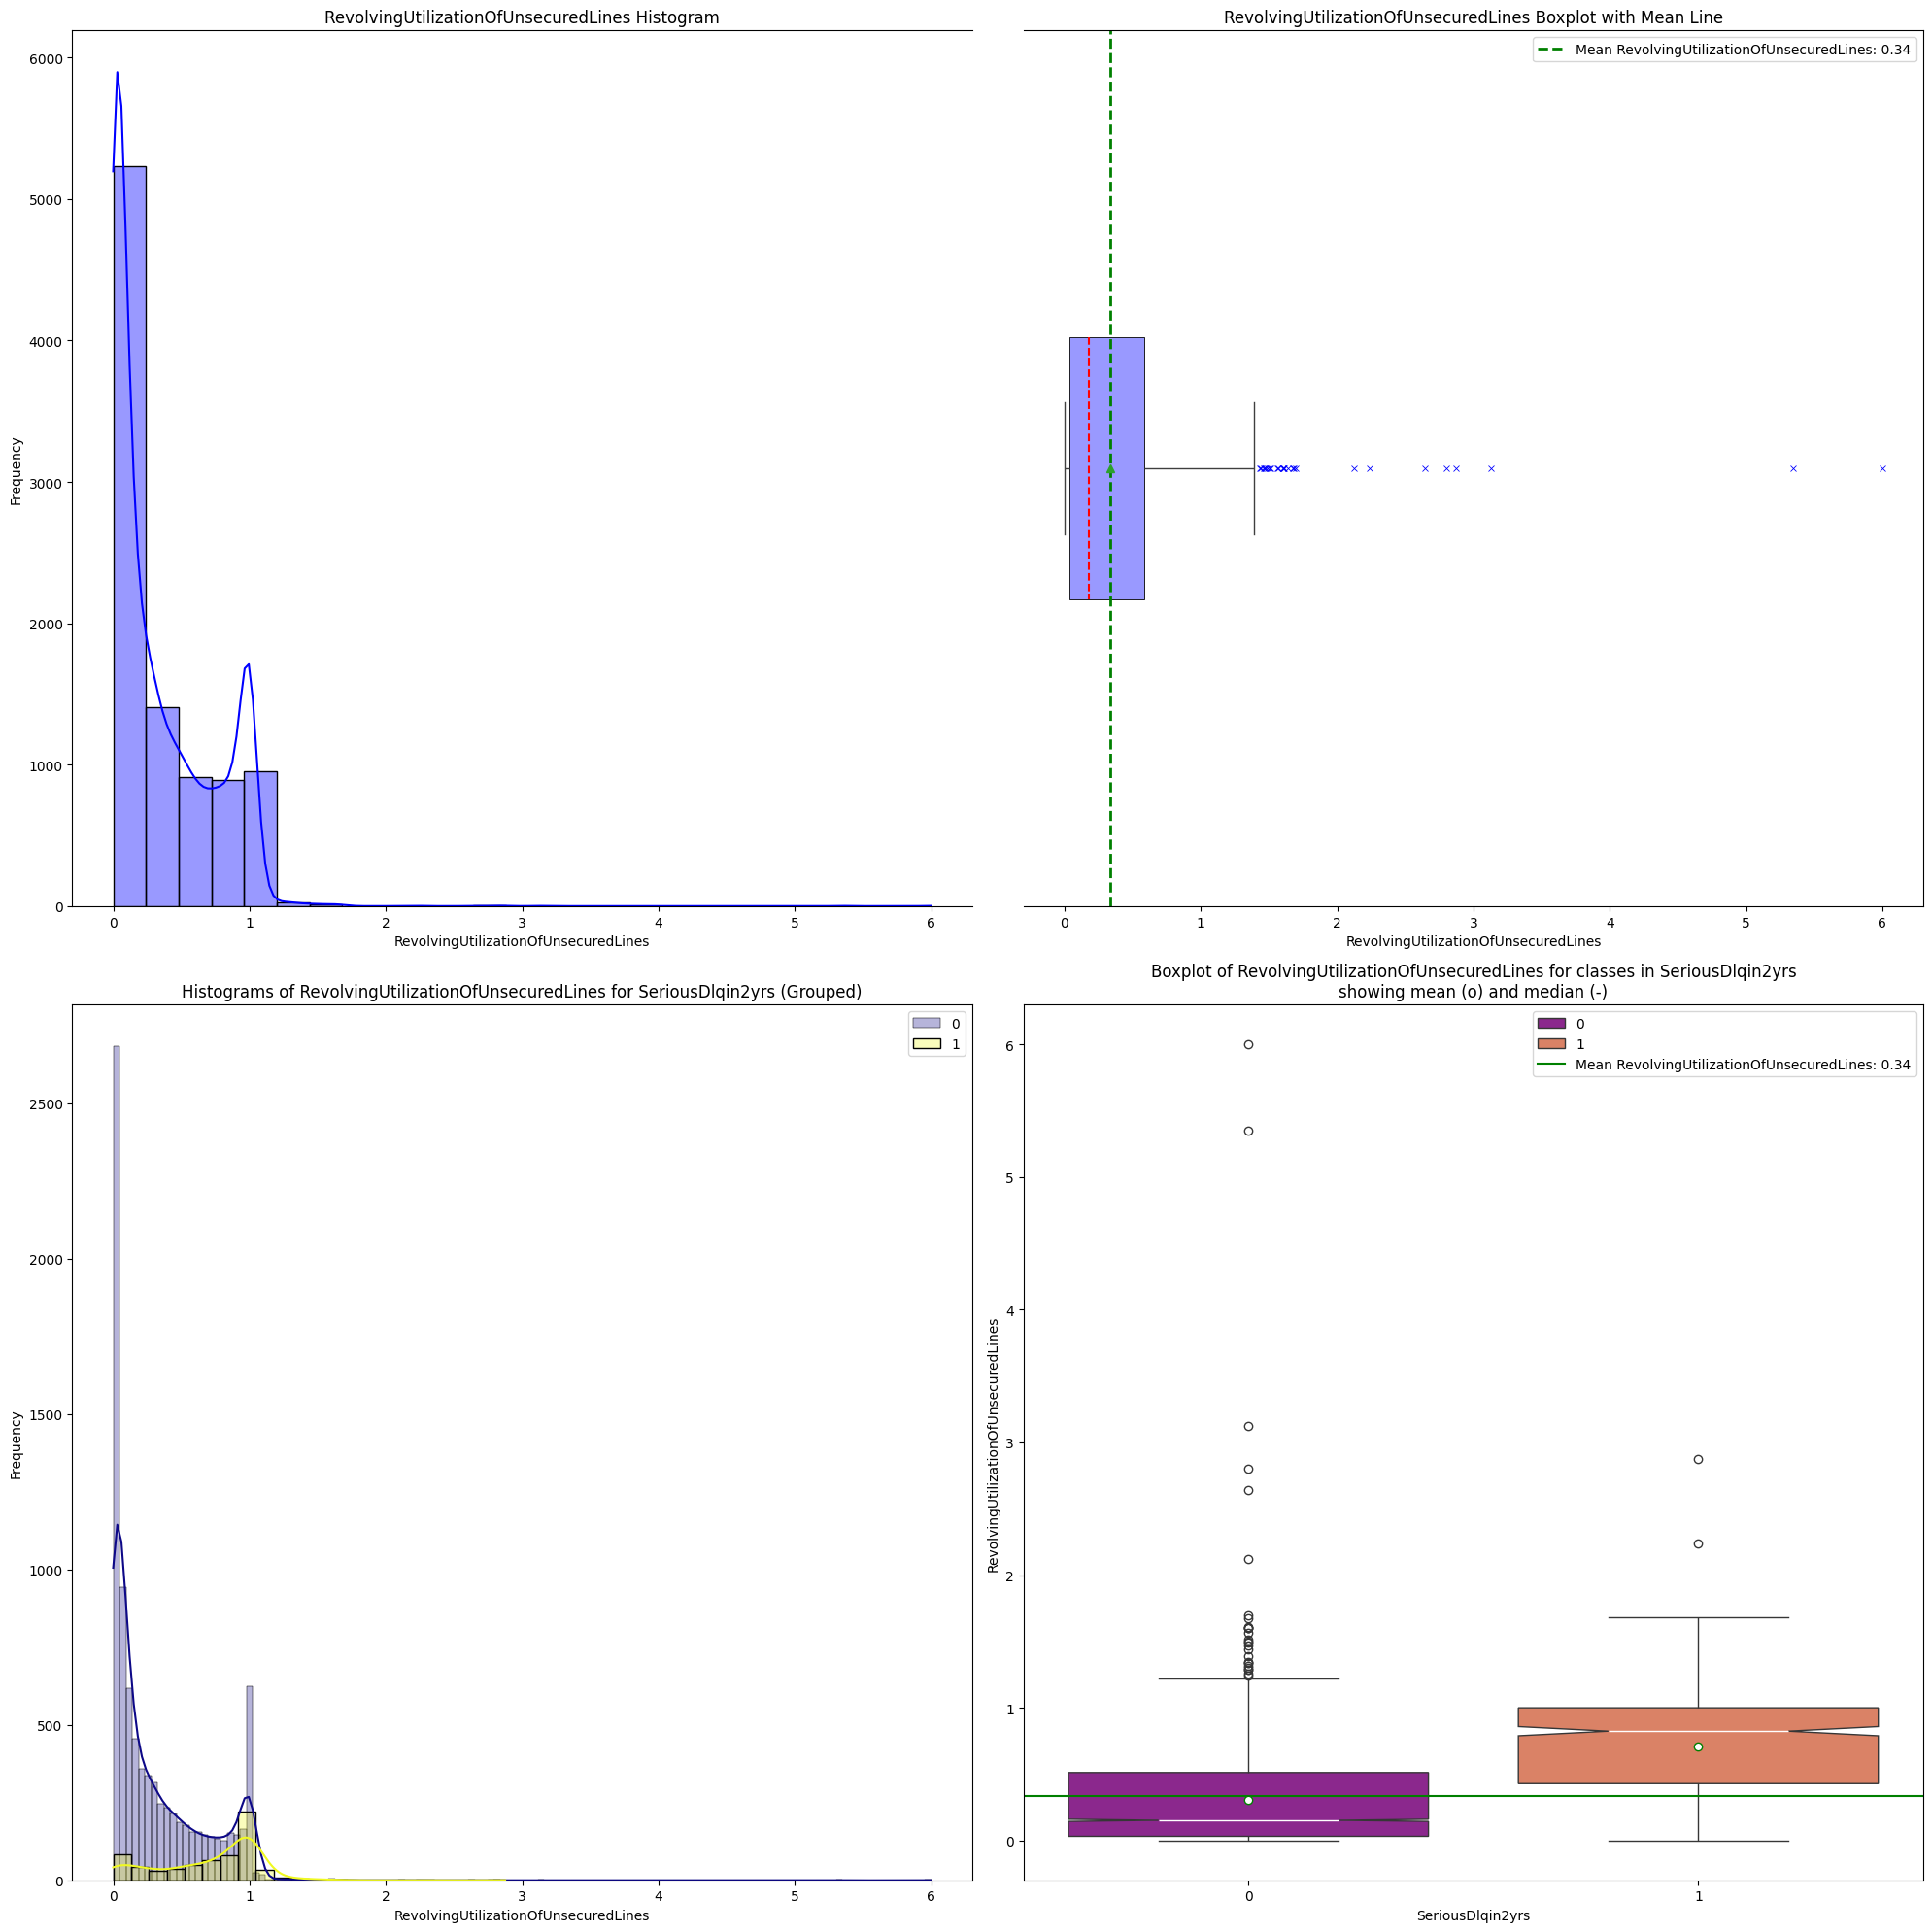

age


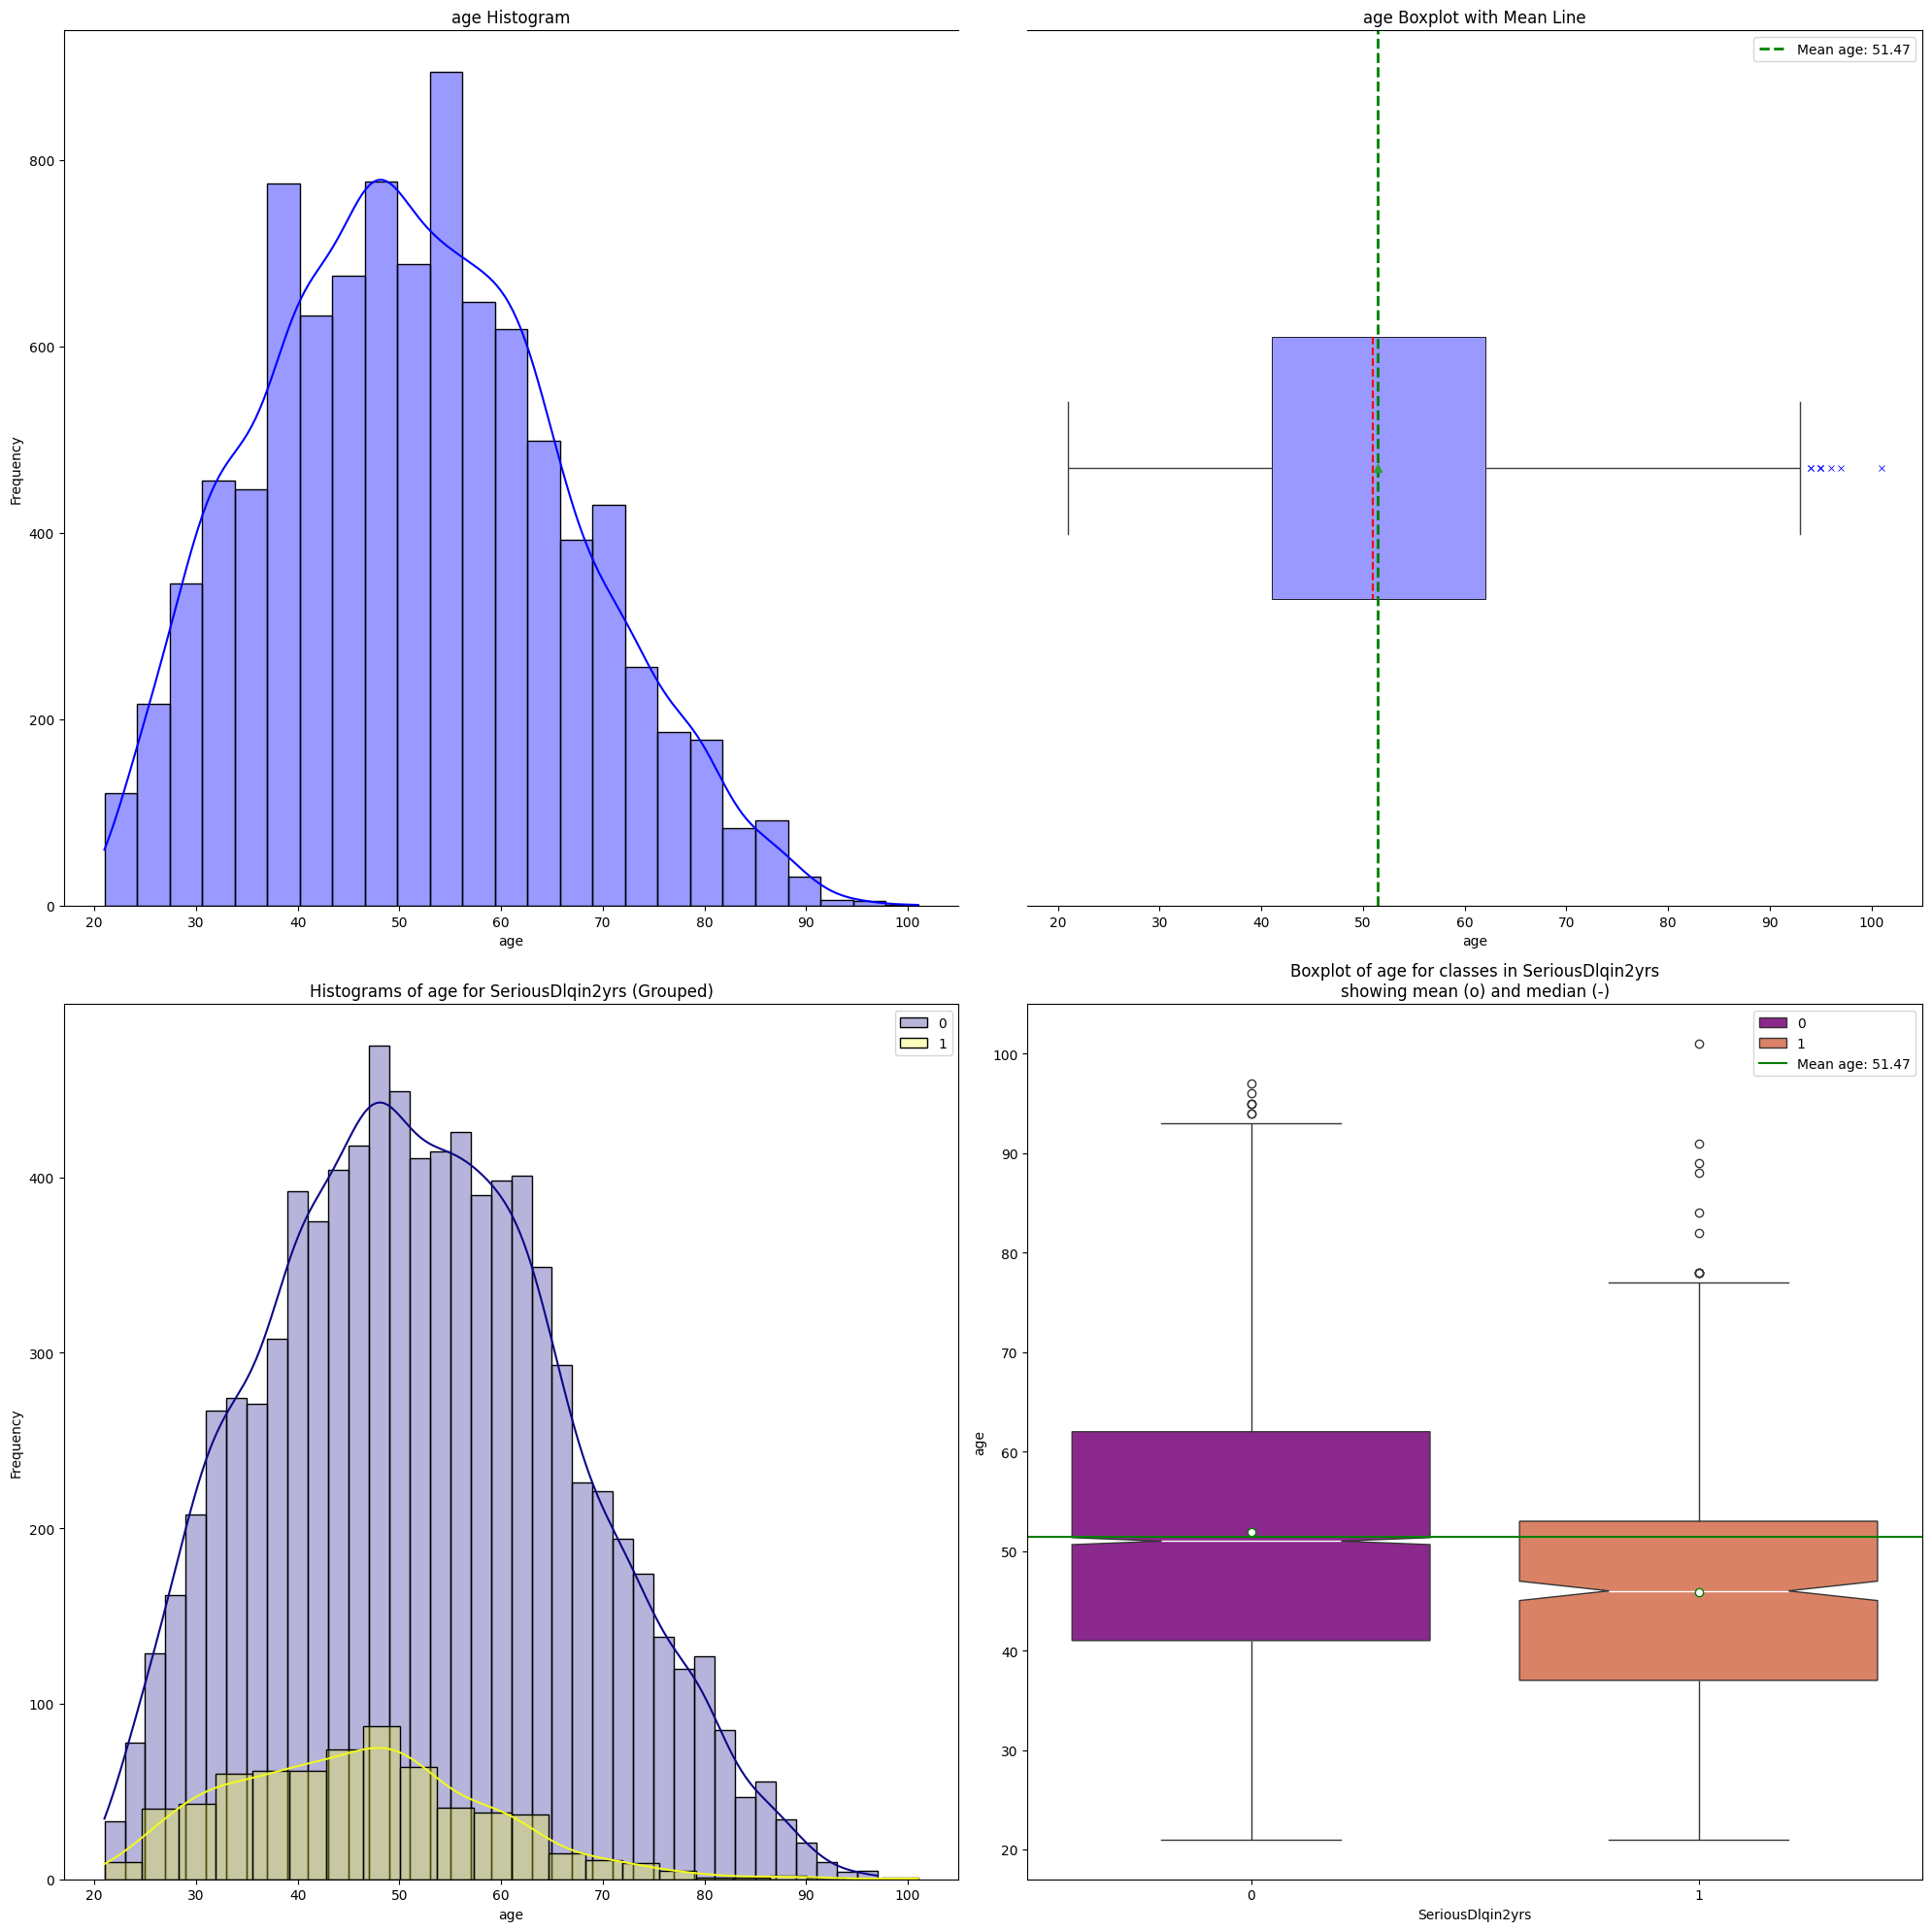

DebtRatio


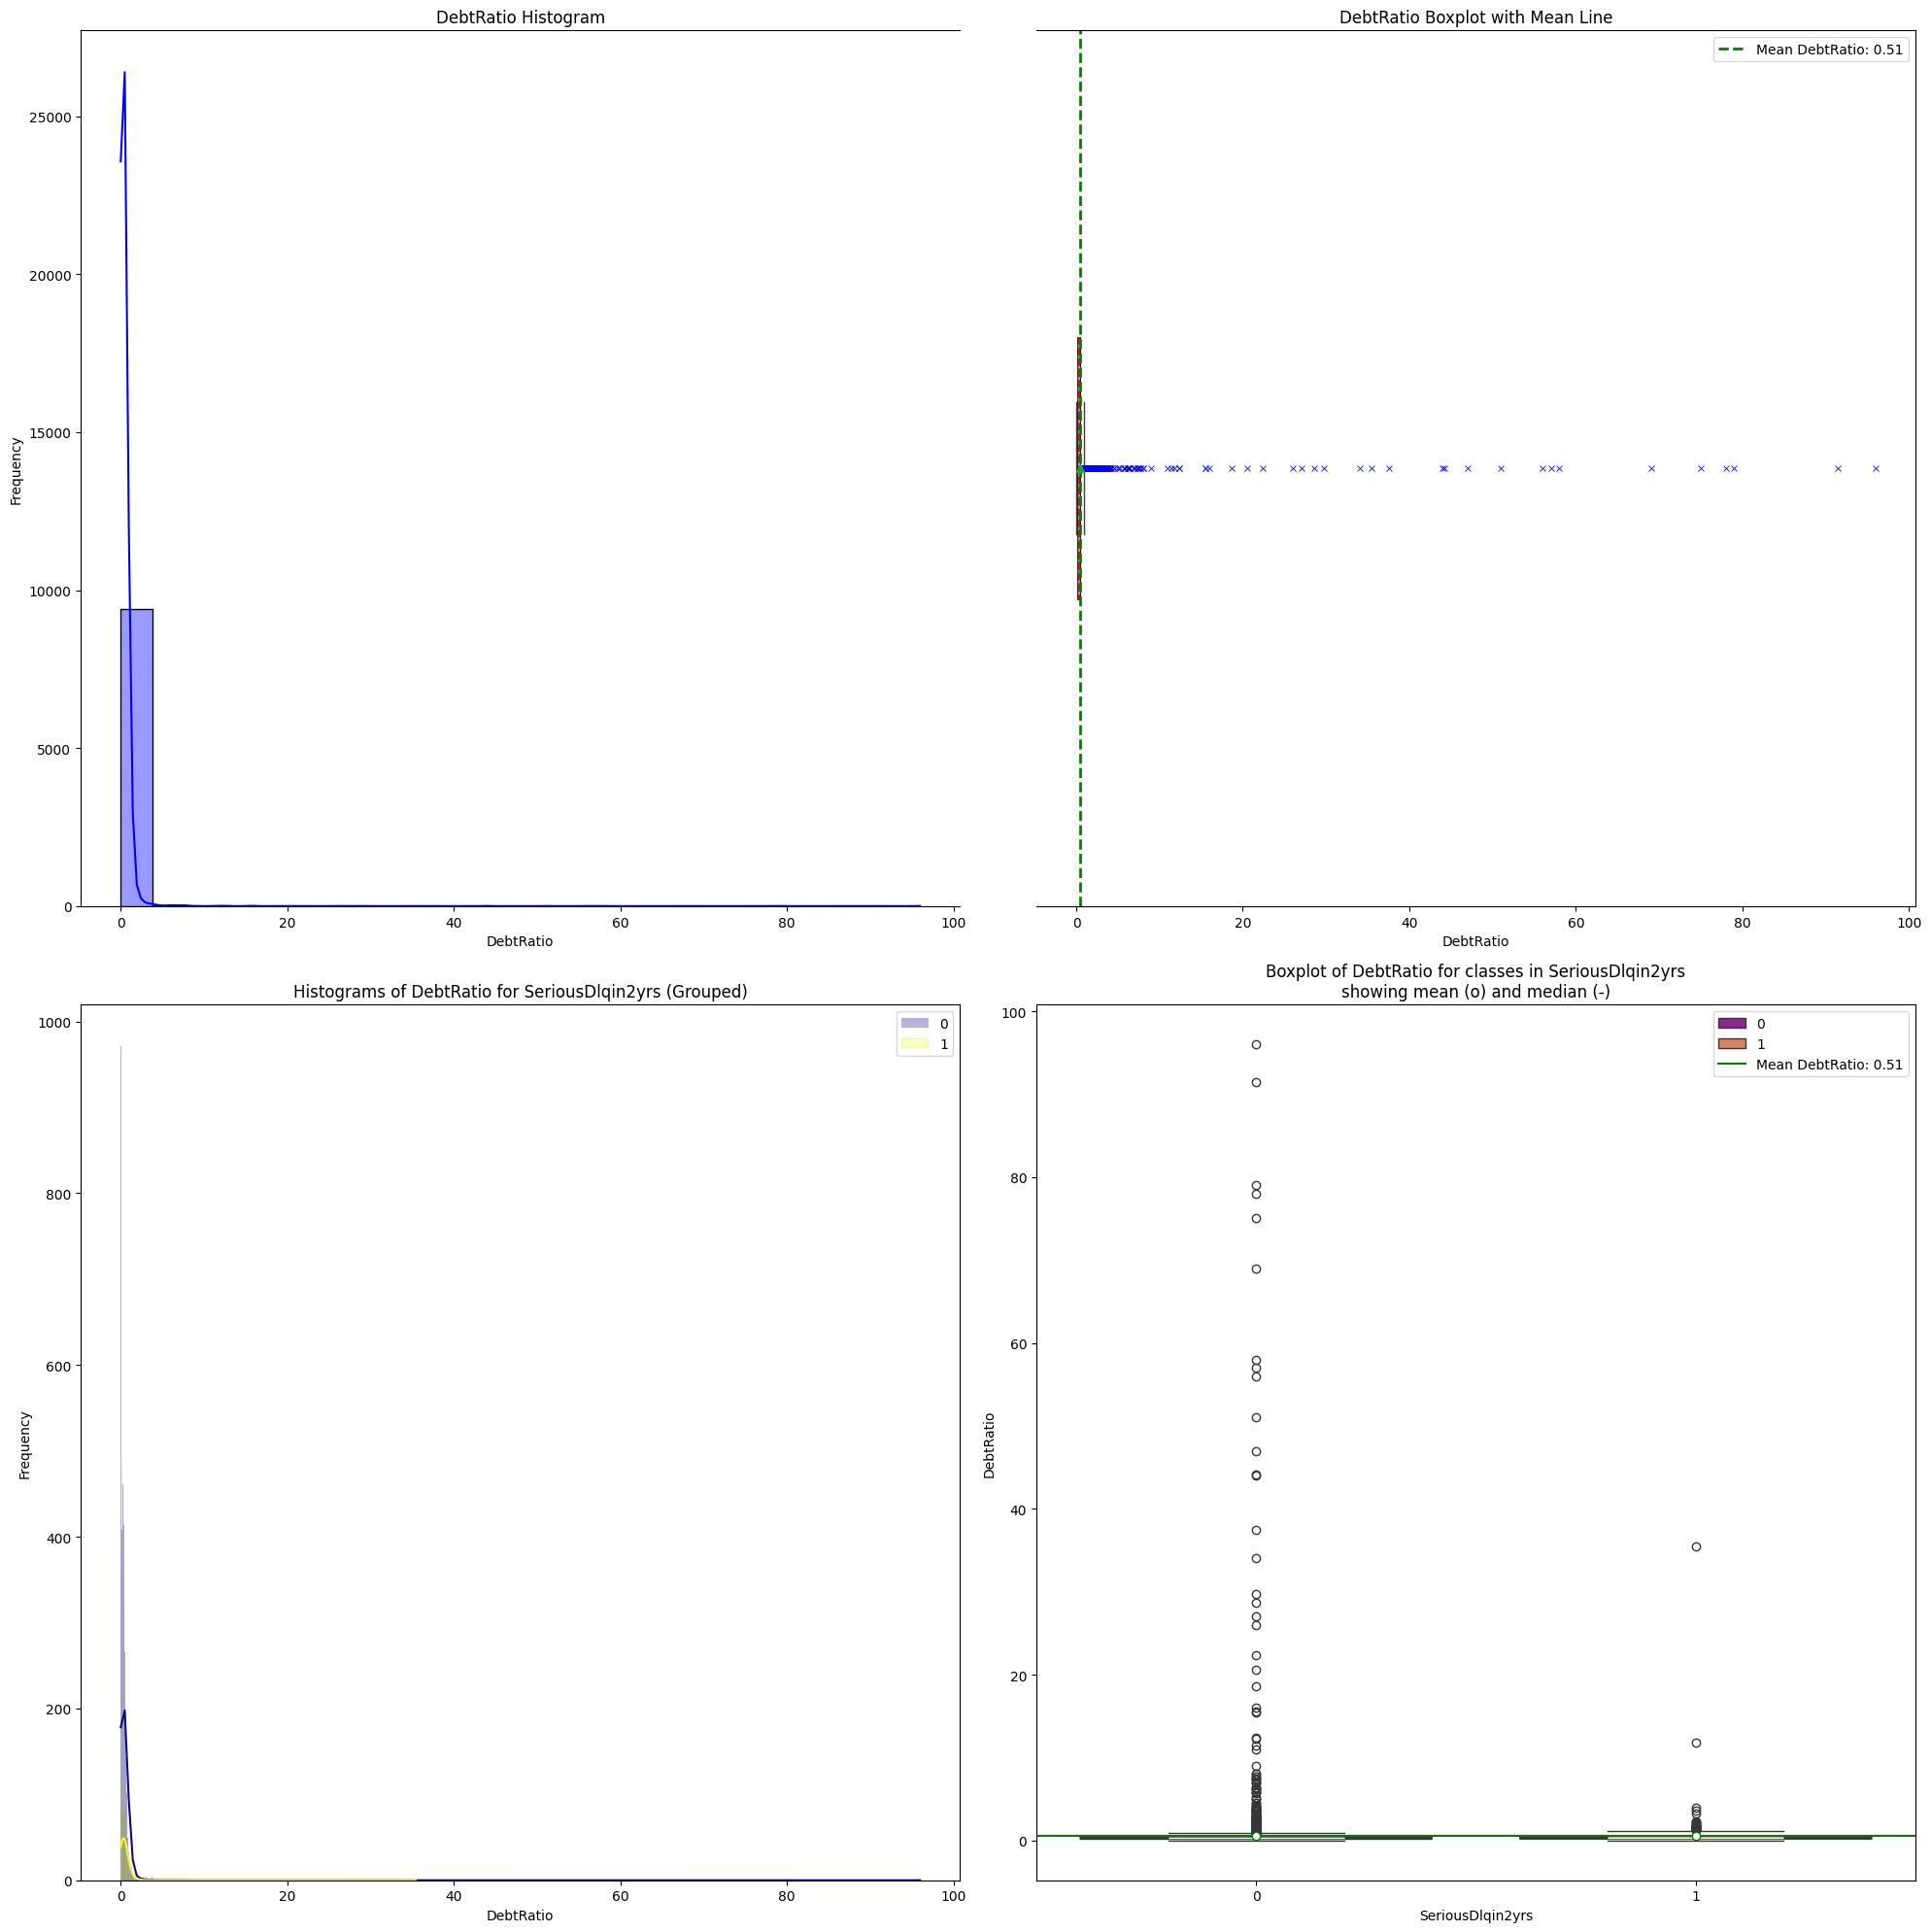

MonthlyIncome


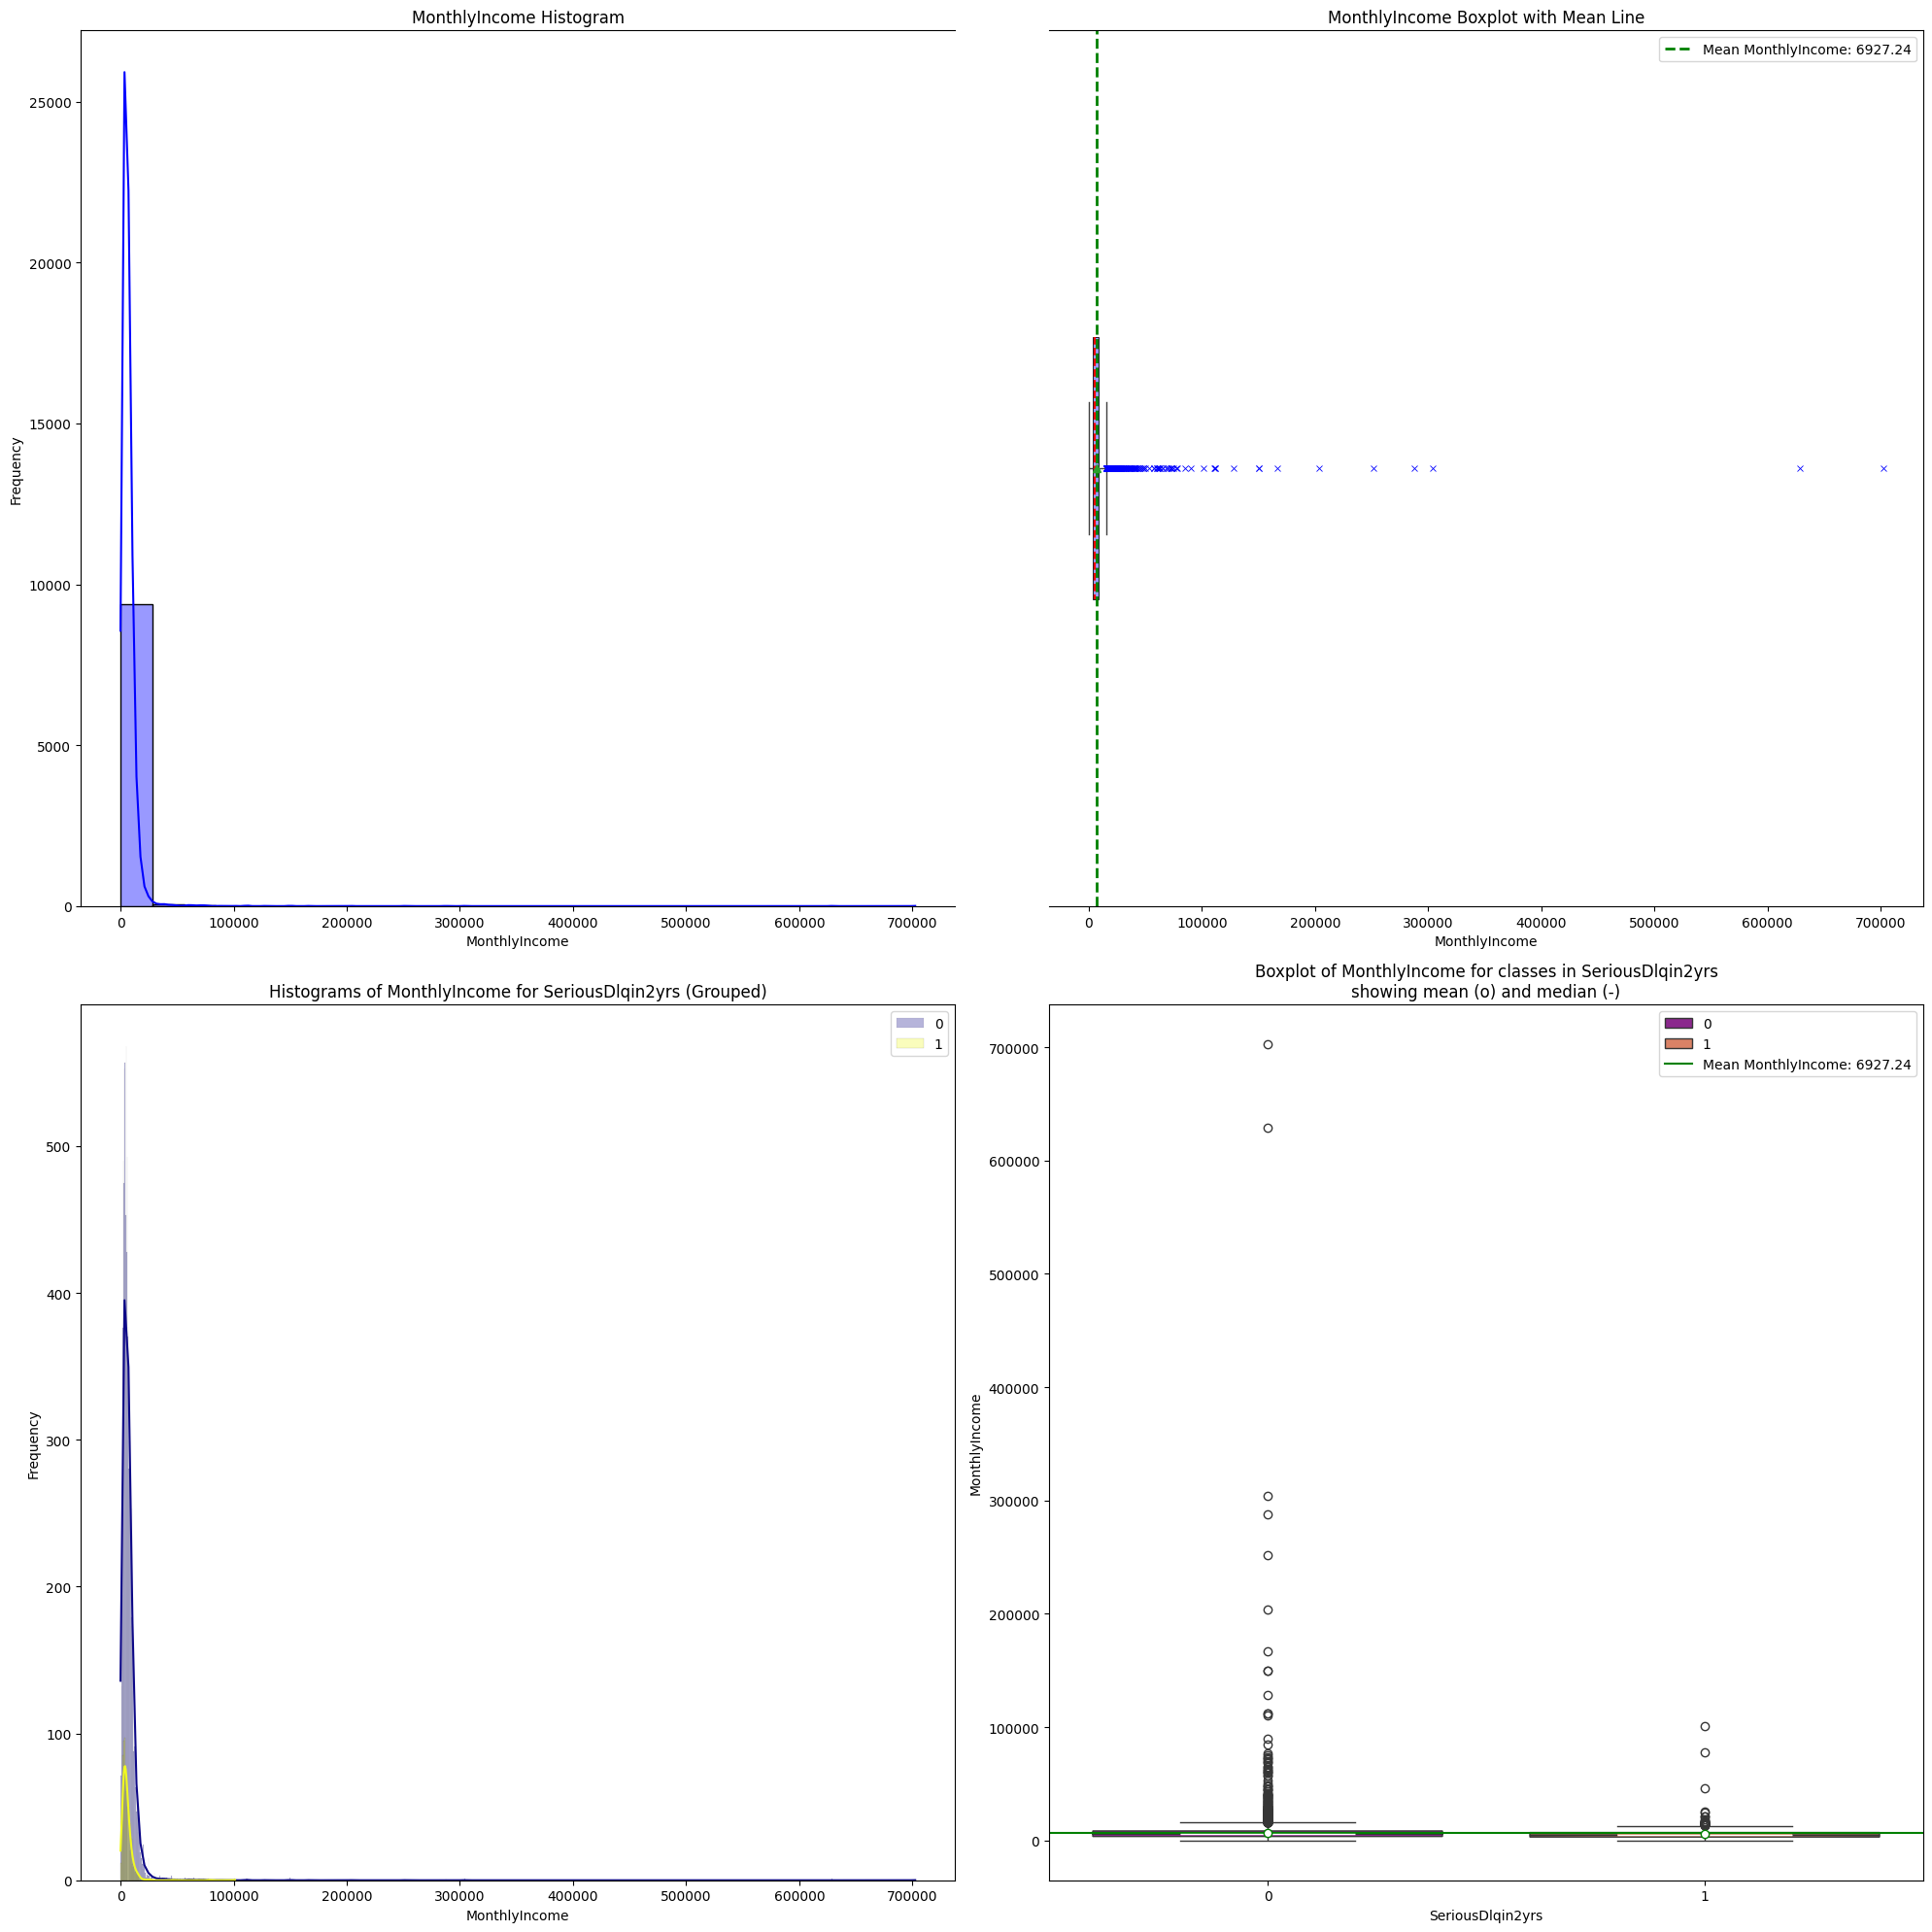

In [52]:
for col in numFeatures:
    if col != target:
        print(col)
        viz.plotAll4(df, cat_col=target, num_col=col, show_mean=True, hist_color='blue', alpha=0.4, element='bars')

---
#### **`RevolvingUtilizationOfUnsecuredLines`** inspection

In [20]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    11816.000000
mean         0.335668
std          0.365209
min          0.000000
25%          0.034927
50%          0.179183
75%          0.587187
max          6.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

- some very high values that are possibly/probably correct but massively skew the data

In [21]:
percentile95 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.95)
percentile99 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
print('Target Distribution Above 95th Percentile for RevolvingUtilizationOfUnsecuredLines')
print(df[df['RevolvingUtilizationOfUnsecuredLines'] >percentile95][target].value_counts())
print()
print('Target Distribution Above 99th Percentile for RevolvingUtilizationOfUnsecuredLines')
print(df[df['RevolvingUtilizationOfUnsecuredLines'] >percentile99][target].value_counts())

Target Distribution Above 95th Percentile for RevolvingUtilizationOfUnsecuredLines
0    157
1    109
Name: SeriousDlqin2yrs, dtype: int64

Target Distribution Above 99th Percentile for RevolvingUtilizationOfUnsecuredLines
0    61
1    58
Name: SeriousDlqin2yrs, dtype: int64


- not a very large or significant different in target distributions above 95th / 99th percentile
- probably not much to gain faffing around with this feature
- possibly an indicator its not a very strong feature
- keep in visuallySelected1

In [22]:
visuallySelected1.append('RevolvingUtilizationOfUnsecuredLines')

---
#### **`DebtRatio` inspection**

Can't really see what's going on with this feature

In [23]:
df['DebtRatio'].describe()

count    11816.000000
mean         0.499708
std          2.696067
min          0.000000
25%          0.143456
50%          0.294748
75%          0.477414
max         96.000000
Name: DebtRatio, dtype: float64

In [24]:
percentile99 = df['DebtRatio'].quantile(0.99)

In [25]:
percentile99

2.331906260050002

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
df['DebtRatio'].value_counts()

0.000000     235
1.000000       3
0.009997       3
0.099192       2
0.296156       2
0.009663       2
0.428893       2
0.269216       2
0.173861       2
0.120576       2
0.167013       2
0.157461       2
0.007308       2
0.011665       2
0.003198       2
0.050817       2
0.023990       2
0.166181       2
0.209940       2
0.037185       2
0.003599       2
0.294341       2
0.012994       2
0.582683       2
0.000444       2
0.002400       2
0.153510       2
0.082040       2
0.301164       2
0.098980       2
0.052789       2
0.294743       2
0.430102       2
0.008526       2
0.004181       2
0.195851       2
0.043319       2
0.534990       2
0.016129       2
0.314274       2
0.139343       2
0.720820       2
8.000000       2
0.226955       2
0.159280       2
0.069612       2
0.056315       2
0.019796       2
0.216557       2
0.117894       2
0.006240       2
0.043304       2
0.382928       2
0.237921       2
0.268546       2
0.207748       2
0.571619       2
0.003200       2
0.001666      

<Axes: >

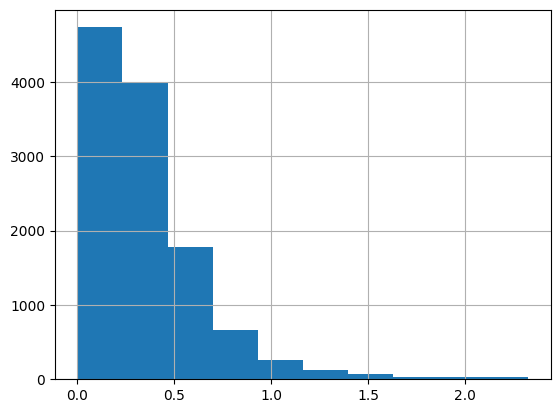

In [28]:
df[df['DebtRatio']<percentile99]['DebtRatio'].hist()

- something seems kind of wrong here
- could be an input error.
- going to cap at 99th percentile (2.331906260050002)
- possibly too generous and should do at 95th??

In [29]:
df['DebtRatioCapped'] = df['DebtRatio'].clip(upper=percentile99)

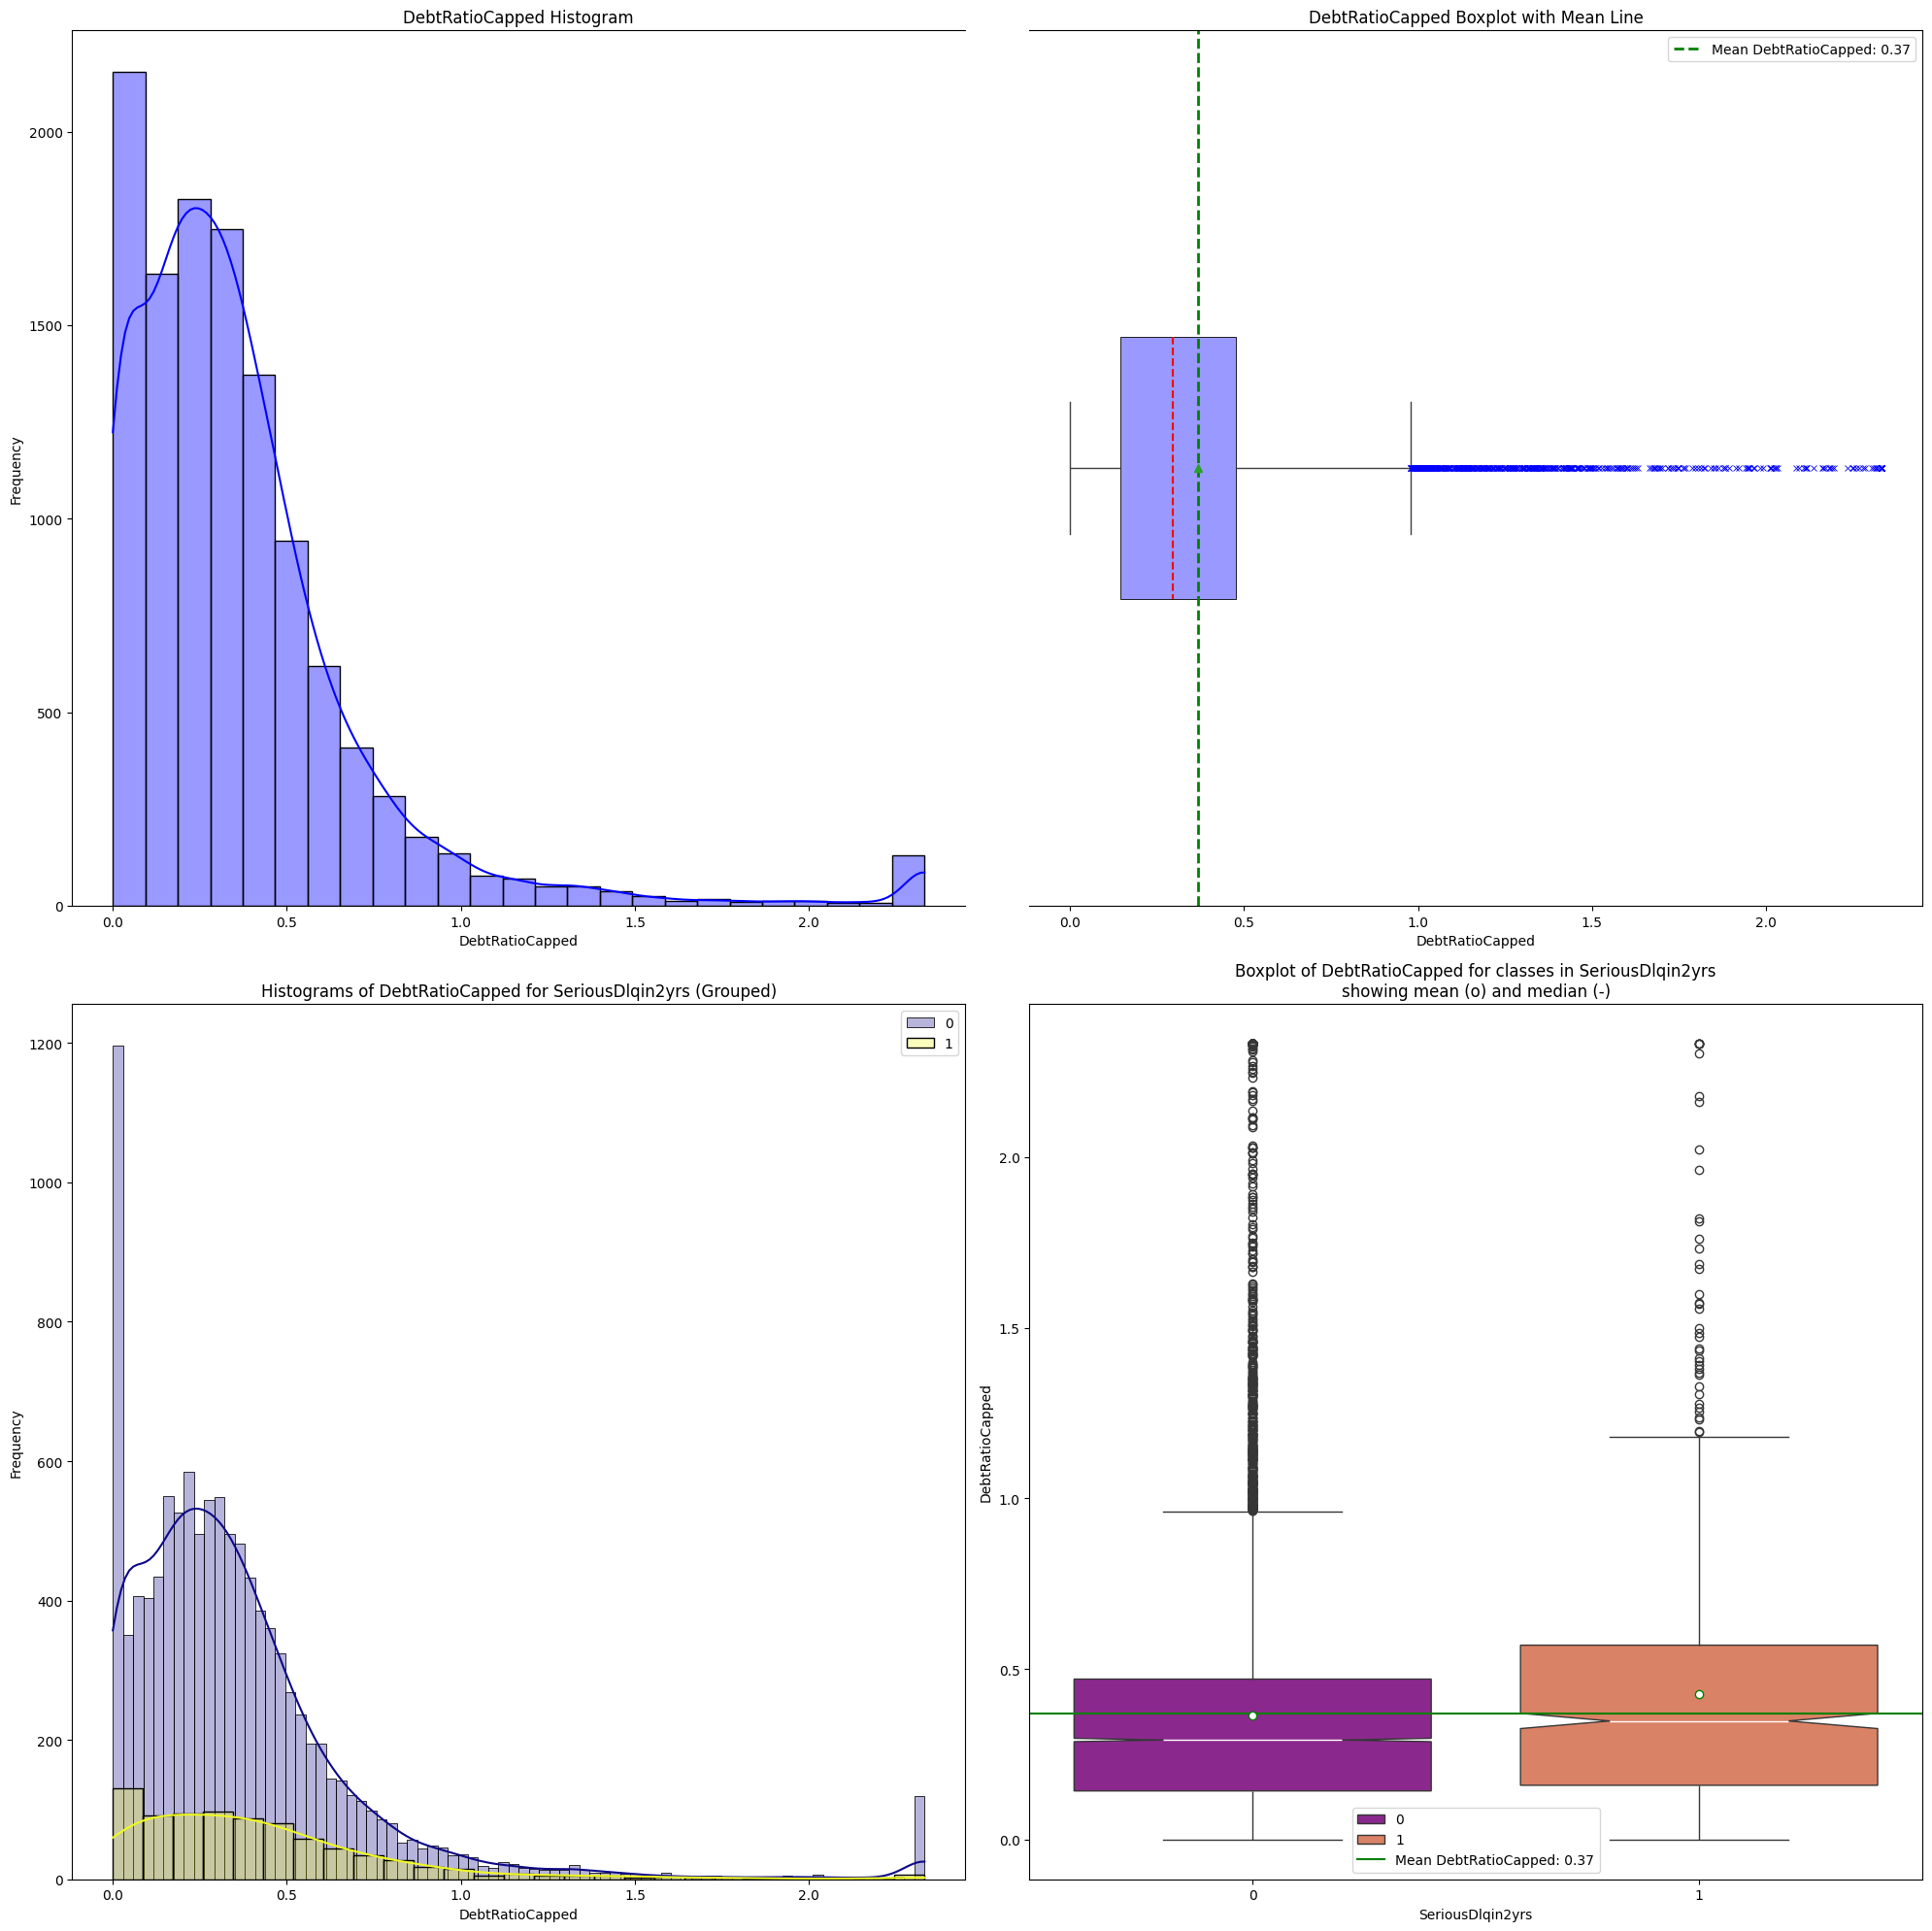

In [30]:
viz.plotAll4(df, cat_col=target, num_col='DebtRatioCapped', show_mean=True, hist_color='blue', alpha=0.4, element='bars')

- gives a better idea of how this feature is distributed between target classes
- possibly an ok feature
- going to add to visuallySelected1
    - much lower general distribution for class 1
    - possibly significant difference in means between target clases
    - possibly due to unblanaced nature of classes...

In [31]:
visuallySelected1.append('DebtRatioCapped')

---
#### **`MonlthlyIncome` inspection**

In [32]:
df['MonthlyIncome'].describe()

count     11816.000000
mean       6864.815420
std       11855.905437
min           0.000000
25%        3498.750000
50%        5416.000000
75%        8300.000000
max      702500.000000
Name: MonthlyIncome, dtype: float64

- some really high values that seem strange as a monthly income for an individual  
- these really skew the data  
- could be a good case to drop outliers or cap at 99th percentile

In [33]:
percentile_95 = df['MonthlyIncome'].quantile(0.95)

In [34]:
percentile99 = df['MonthlyIncome'].quantile(0.99)

- Although 1% isnt such a significant proprtion of the dataset i, going to try capping
- capping could be a better option as it won't lose other potentially valuable info from other features

<Axes: >

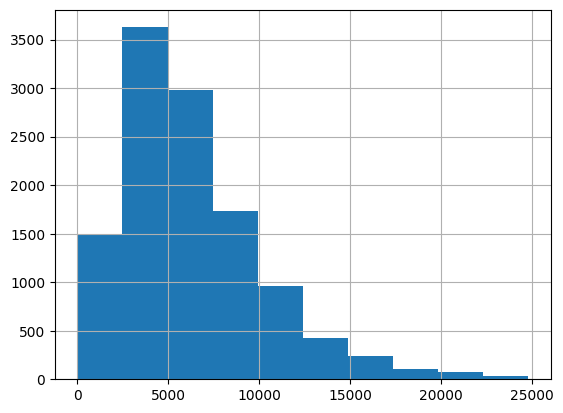

In [35]:
df[df['MonthlyIncome']<25000]['MonthlyIncome'].hist()

- going to try capping as not capped anything before. Will see how it turns out
- capped individuals will still show some relationship with high `MonthlyIncome` and other features.
- going to cap slightly above the 95

In [36]:
df['MonthlyIncomeCapped'] = df['MonthlyIncome'].clip(upper=percentile99)

<Axes: >

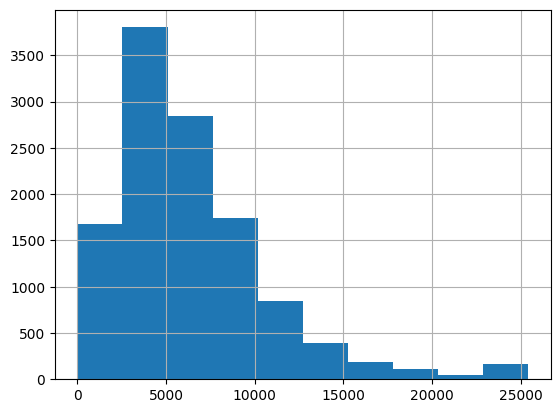

In [37]:
df['MonthlyIncomeCapped'].hist()

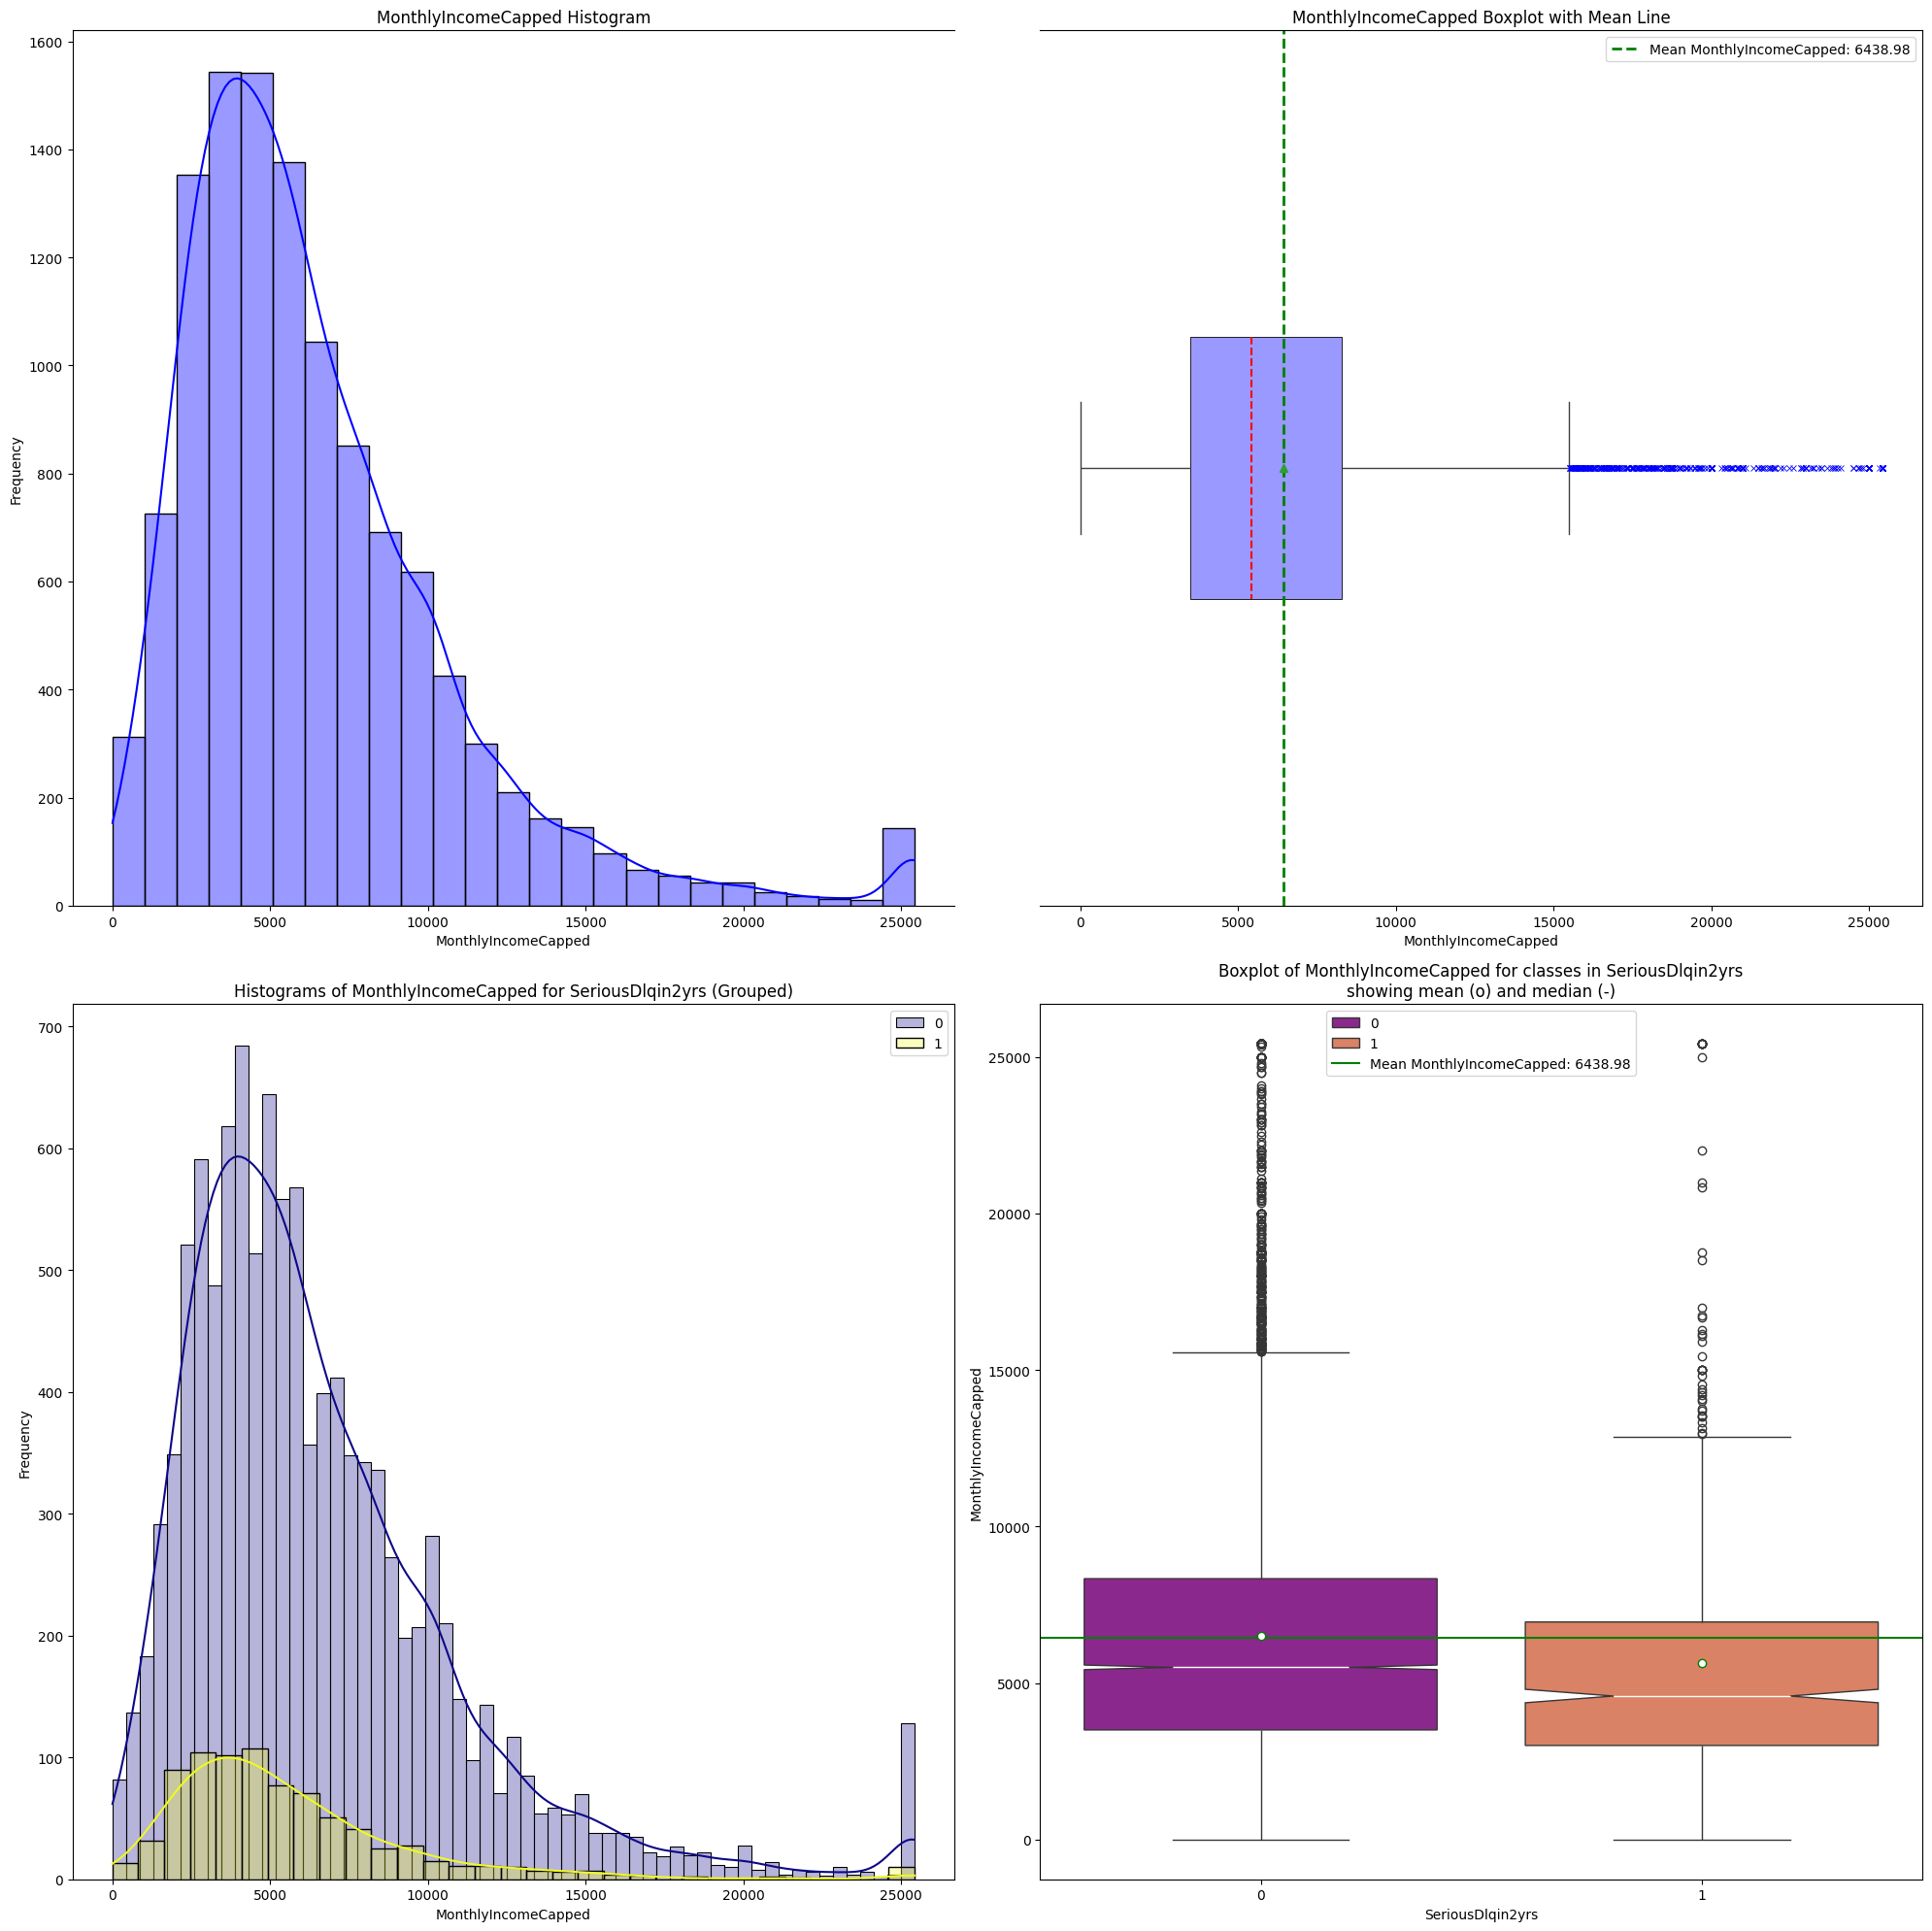

In [38]:
viz.plotAll4(df, cat_col=target, num_col='MonthlyIncomeCapped', show_mean=True, hist_color='blue', alpha=0.4, element='bars')

<Axes: >

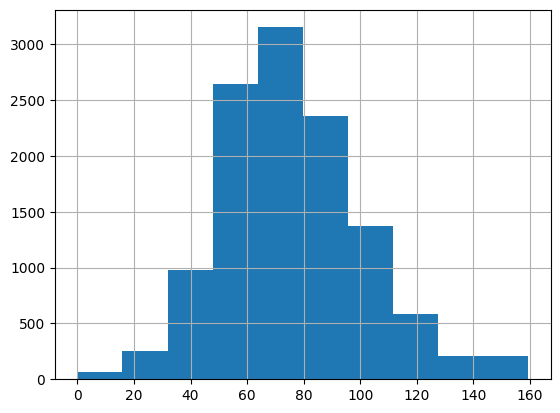

In [39]:
np.sqrt(df['MonthlyIncomeCapped']).hist()

- np.sqrt transformation gets a fairly gaussian distribution for linear regression based / distance important models
- going to add it is another variable just for practice

In [40]:
df['IncomeTransformed'] = np.sqrt(df['MonthlyIncomeCapped'])

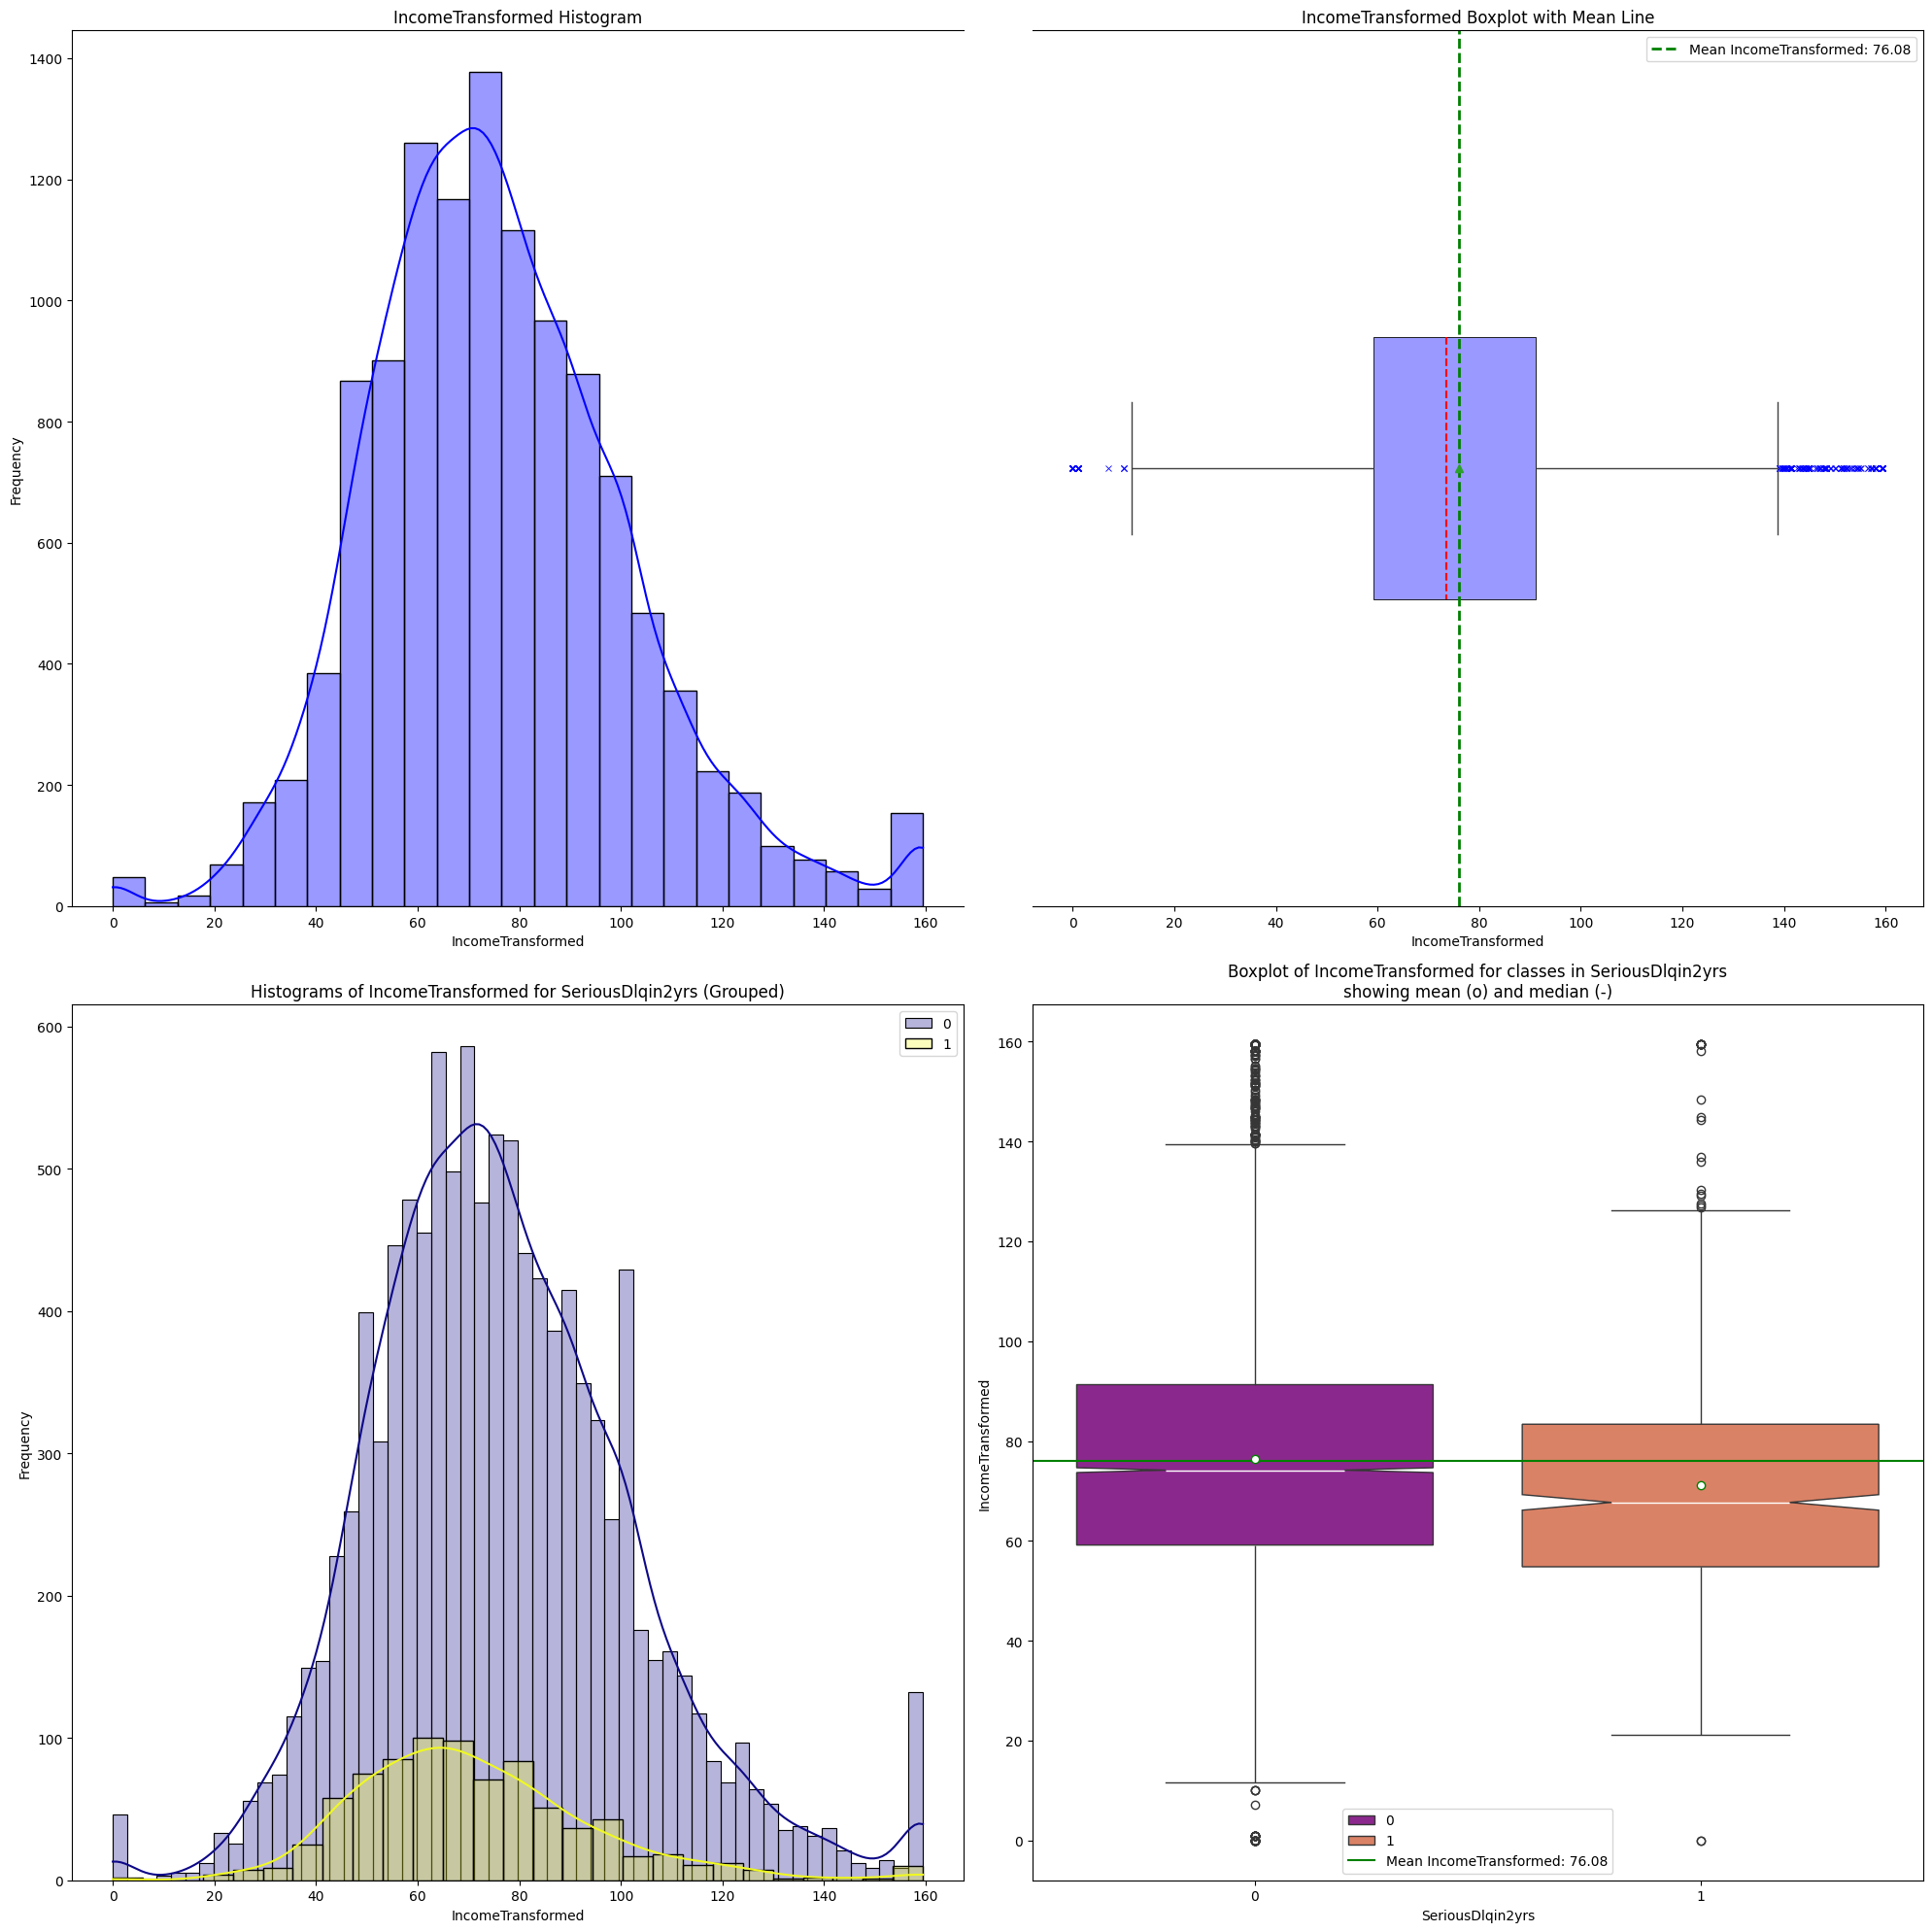

In [41]:
num_col = 'IncomeTransformed'
viz.plotAll4(df, cat_col=target, num_col=num_col, show_mean=True, hist_color='blue', alpha=0.4, element='bars')

- all that faff and it doesnt present as a particularly strong feature. Going to keep in the capped version
- add `MonthlyIncomeCapped` to visuallySelected1

In [42]:
visuallySelected1.append('MonthlyIncomeCapped')

---

In [43]:
visuallySelected1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines',
 'RevolvingUtilizationOfUnsecuredLines',
 'DebtRatioCapped',
 'MonthlyIncomeCapped']

---
## Pairplots

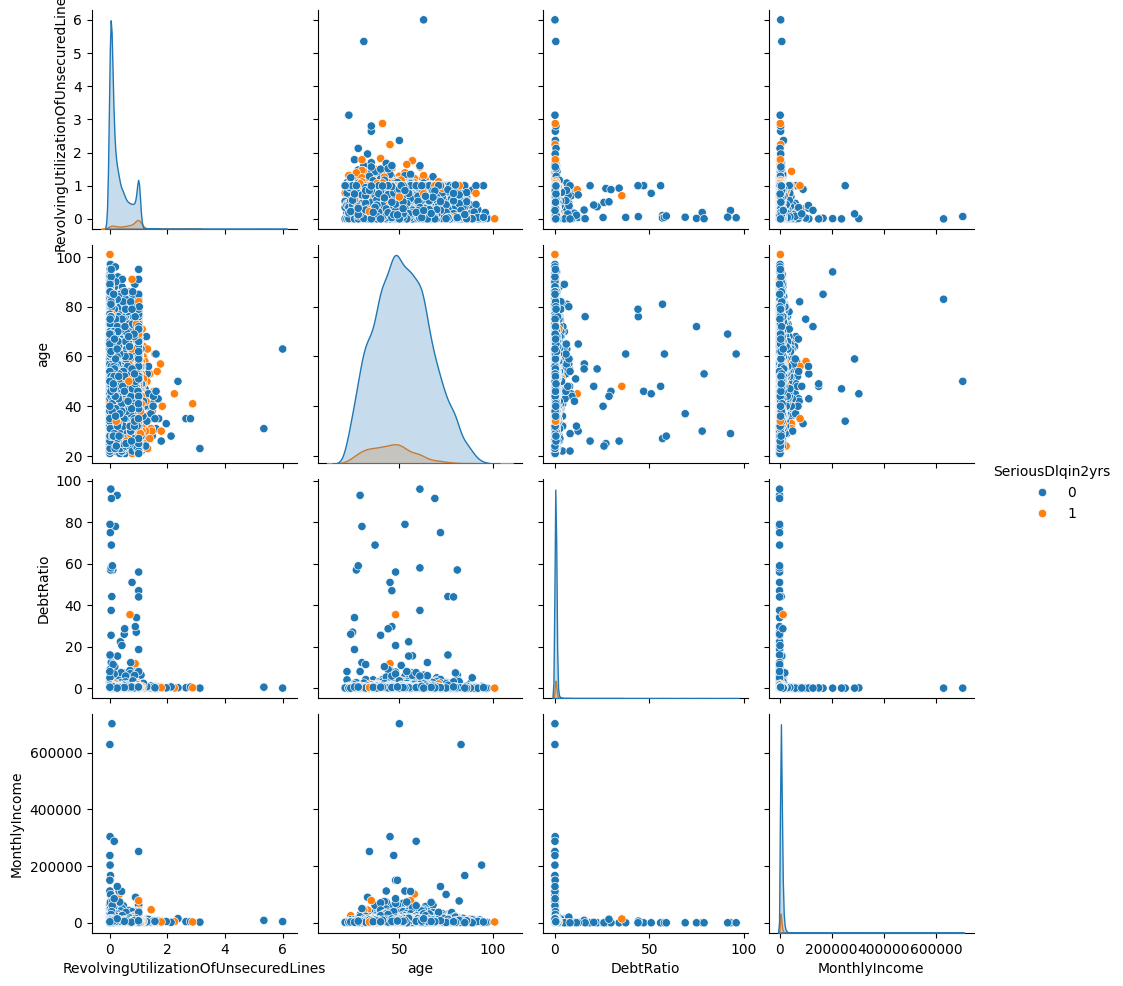

In [44]:
sns.pairplot(df[numFeatures], hue=target)

- all look kind of trash!

#### **`RevolvingUtilizationOfUnsecuredLines`**
- could be good.
- looked like there was some crossing over of kde distributions for target classes
- 1 class swamped by 0 so difficult to say
- add to `visuallySelected1`

#### **`age`**
- class 1 seems capped at a given age threshold
- could work well as a predictor of target class 1
- add to `visuallySelected1`

#### **`DebtRatio`**
- doesn't look amazing
- keep in `visuallySelected1` anyway

#### **`MonthlyIncome`**
- added capped version to `visuallySelected1`
- not a particularly strong feature
- doesnt show much crossing over of kde plots and class 1 distribution swamped by class 2
- this could work as an indicative predictor of class based on threshold values.

In [ ]:
visuallySelected1.append('age')

---
## Heatmapping
Checking for colinearity

In [45]:
visuallySelected1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberRealEstateLoansOrLines',
 'RevolvingUtilizationOfUnsecuredLines',
 'DebtRatioCapped',
 'MonthlyIncomeCapped']

<Axes: >

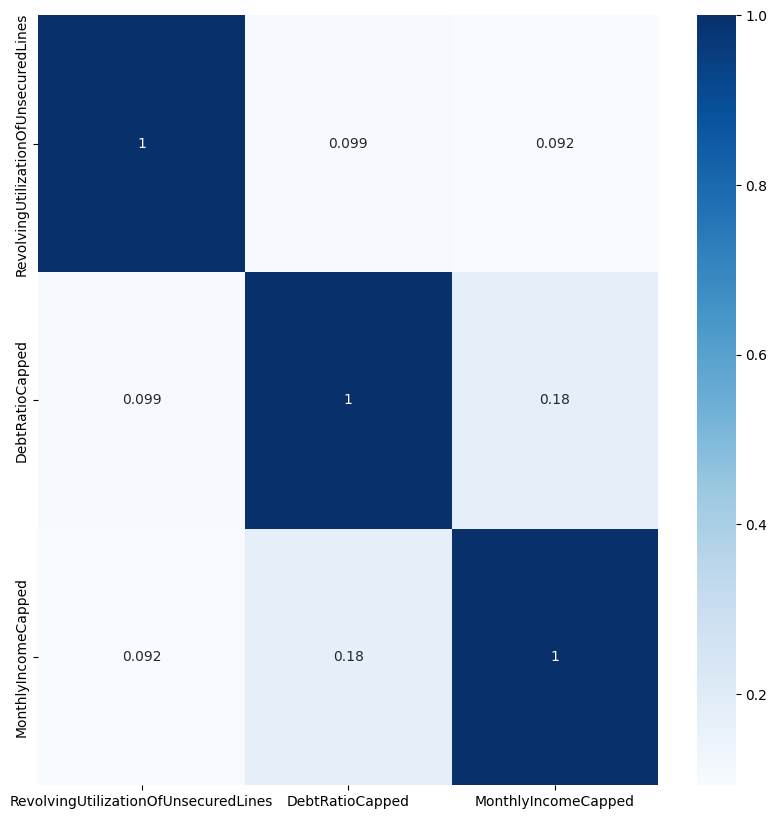

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df[visuallySelected1].corr(numeric_only=True)), annot=True, cmap='Blues')

- not worried about any colinearity issues in my selection

## Heatmapping all features

In [50]:
allFeatures = [col for col in df.columns]

<Axes: >

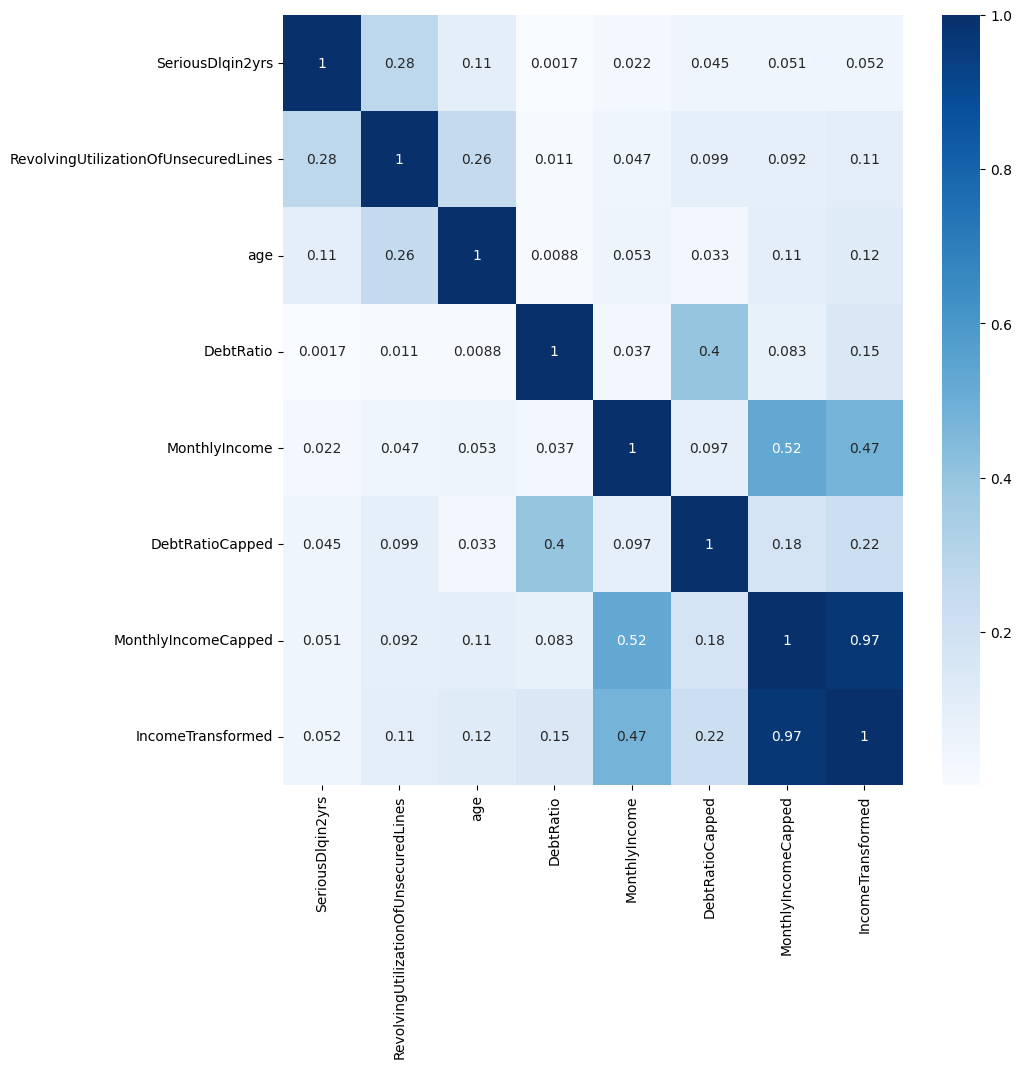

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df[allFeatures].corr(numeric_only=True)), annot=True, cmap='Blues')

- other than the expected colinearity of transformed / capped variables with originals nothing here that i am seeing as an issue

---
---
## Modelling

Feature Sets:
- visuallySelected1
- allFeatures

Train test split a bit late and should be before EDA, just didnt want to go back and apply any changes to test retrospectively as not the (my) focus of this exercise

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

In [55]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)

X_trainVis = train[visuallySelected1]
X_trainFull = train[allFeatures]
X_trainFull.drop(target, axis=1, inplace=True)

In [56]:
y_train = train[target]

---
# Baseline

In [57]:
from sklearn.model_selection import cross_val_score

In [61]:
rfBSL = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

scoreBSL = np.mean(cross_val_score(rfBSL, X_trainFull, y_train, cv=5, scoring='balanced_accuracy'))
print(f'Baseline balanced accuracy score: {scoreBSL*100}%\nNumber of features: {len(X_trainFull.columns)}')

Baseline balanced accuracy score: 56.739336592014965%
Number of features: 13


In [62]:
rfVis = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)
scoreVis = np.mean(cross_val_score(rfVis, X_trainVis, y_train, cv=5, scoring='balanced_accuracy'))
print(f'Baseline balanced accuracy score: {scoreVis*100}%\nNumber of features: {len(X_trainVis.columns)}')

Baseline balanced accuracy score: 56.65713059616877%
Number of features: 7


---
Metric ideas:
- both kind of bad
- i think i want to be trying to improve the recall
- it doesnt matter too much if we accidentally flag a class 0 case as class 1 but we dont want to lose any of the class 1 cases
    - recall the metric i want to improve along with ROC-AUC

---
## ANOVA

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

In [67]:
numFeatsANOVA = 5
selectFeature = SelectKBest(f_classif, k=numFeatsANOVA).fit(X_trainFull, y_train)

In [68]:
bestFeatures = pd.DataFrame({'Feature': X_trainFull.columns, 'Score': selectFeature.scores_}).sort_values(by='Score', ascending=False)
featuresANOVA = selectFeature.get_feature_names_out()
bestFeatures.head()

,Feature,Score
6,NumberOfTimes90DaysLate,1595.259533
0,RevolvingUtilizationOfUnsecuredLines,788.269908
8,NumberOfTime60-89DaysPastDueNotWorse,786.196556
2,NumberOfTime30-59DaysPastDueNotWorse,715.193074
5,NumberOfOpenCreditLinesAndLoans,140.246666


In [73]:
bestANOVA = list(featuresANOVA)

In [78]:
X_trainANOVA = selectFeature.transform(X_trainFull)

rfANOVA = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

scoreANOVA = np.mean(cross_val_score(rfANOVA, X_trainANOVA, y_train, cv=5, scoring='balanced_accuracy'))
print(f'ANOVA balanced accuracy score: {scoreANOVA*100}%')


ANOVA balanced accuracy score: 58.78355147045609%


---
## RFE

In [79]:
from sklearn.feature_selection import RFE

In [82]:
rfRFE = rf

numFeatsRFE = 5
rfe = RFE(estimator=rf, n_features_to_select=numFeatsRFE, step=1)
rfe.fit(X_trainFull, y_train)
X_trainRFE = rfe.transform(X_trainFull)

scoreRFE = np.mean(cross_val_score(rfRFE, X_trainRFE, y_train, cv=5, scoring='balanced_accuracy'))
print(scoreRFE*100)

57.46963151184599


In [92]:
featuresRFE = list(rfe.get_feature_names_out())
featuresRFE

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate',
 'DebtRatioCapped']

---

## select_from_model

In [85]:
from sklearn.feature_selection import SelectFromModel

In [86]:
selectorModel = SelectFromModel(estimator=rf, threshold='median')
selectorModel.fit(X_trainFull, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=7, n_estimators=1,
                                                 random_state=42),
                threshold='median')

In [91]:
selectorModelFeatures = list(selectorModel.get_feature_names_out())

---
## RFECV

In [95]:
from sklearn.feature_selection import RFECV

In [96]:
rfRFECV = RFECV(estimator=rf, step=1, cv=5, scoring='balanced_accuracy')
rfRFECV.fit(X_trainFull, y_train)
rfRFECVFeatures = list(rfRFECV.get_feature_names_out())

In [118]:
featureSets = {'allFeatures':allFeatures, 'visuallySelected1':visuallySelected1, 'bestANOVA':bestANOVA, 'featuresRFE':featuresRFE, 'selectorModelFeatures':selectorModelFeatures, 'rfRFECVFeatures':rfRFECVFeatures}

In [107]:
rfRFECVFeatures

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate',
 'DebtRatioCapped']

In [99]:
catFeatures

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'NumberRealEstateLoansOrLines']

---
## Final models with each of the 6 feature sets

In [109]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [110]:
logRegModel = LogisticRegression(max_iter=1000)
catModel = CatBoostClassifier(cat_features=[], iterations=1000, learning_rate=0.1, depth=6, verbose=False, random_state=42)
rfModel = RandomForestClassifier(n_estimators=1, max_depth=7, random_state=42)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XScaled = scaler.fit_transform(X_trainFull)

In [119]:
for setName, feature_set in featureSets.items():
    X = X_trainFull[feature_set]
    
    logRegScores = np.mean(cross_val_score(logRegModel, XScaled, y_train, cv=5, scoring='balanced_accuracy'))
    print(f'Logistic Regression - Feature Set: {setName} | Balanced Accuracy: {logRegScores:.4f}')
    
    catModel.set_params(cat_features=[col for col in catFeatures if col in feature_set])
    catBoostScore = np.mean(cross_val_score(catModel, X, y_train, cv=5, scoring='balanced_accuracy'))
    print(f'CatBoost Classifier - Feature Set: {setName} | Balanced Accuracy: {catBoostScore:.4f}')
    
    rfScore = np.mean(cross_val_score(rfModel, X, y_train, cv=5, scoring='balanced_accuracy'))
    print(f'Random Forest - Feature Set: {setName} | Balanced Accuracy: {rfScore:.4f}')
    print()

Logistic Regression - Feature Set: allFeatures | Balanced Accuracy: 0.5940
CatBoost Classifier - Feature Set: allFeatures | Balanced Accuracy: 0.5933
Random Forest - Feature Set: allFeatures | Balanced Accuracy: 0.5674

Logistic Regression - Feature Set: visuallySelected1 | Balanced Accuracy: 0.5940
CatBoost Classifier - Feature Set: visuallySelected1 | Balanced Accuracy: 0.5977
Random Forest - Feature Set: visuallySelected1 | Balanced Accuracy: 0.5666

Logistic Regression - Feature Set: bestANOVA | Balanced Accuracy: 0.5940
CatBoost Classifier - Feature Set: bestANOVA | Balanced Accuracy: 0.5955
Random Forest - Feature Set: bestANOVA | Balanced Accuracy: 0.5878

Logistic Regression - Feature Set: featuresRFE | Balanced Accuracy: 0.5940
CatBoost Classifier - Feature Set: featuresRFE | Balanced Accuracy: 0.5963
Random Forest - Feature Set: featuresRFE | Balanced Accuracy: 0.5747

Logistic Regression - Feature Set: selectorModelFeatures | Balanced Accuracy: 0.5940
CatBoost Classifier - F

{'neg_median_absolute_error', 'f1_micro', 'neg_mean_squared_error', 'top_k_accuracy', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard_weighted', 'jaccard_macro', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'positive_likelihood_ratio', 'recall_weighted', 'f1_macro', 'jaccard_micro', 'adjusted_mutual_info_score', 'r2', 'max_error', 'recall_micro', 'v_measure_score', 'f1_samples', 'precision_micro', 'neg_mean_squared_log_error', 'matthews_corrcoef', 'recall_macro', 'precision', 'accuracy', 'precision_weighted', 'recall_samples', 'mutual_info_score', 'neg_log_loss', 'neg_negative_likelihood_ratio', 'completeness_score', 'neg_mean_absolute_error', 'explained_variance', 'jaccard', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'neg_mean_poisson_deviance', 'normalized_mutual_info_score', 'neg_mean_gamma_deviance', 'f1', 'neg_mean_absolute_percentage_error', 'recall', 'balanced_accuracy', 'roc_auc_ovr', 'average_precision', 'f1_weighted', 'adjusted_rand_score', 'precision_samples', 'roc_auc', 'rand_score', 'roc_auc_ovr_weighted', 'precision_macro', 'd2_absolute_error_score', 'jaccard_samples', 'neg_brier_score'}, a callable or None. Got 'blanced_accuracy' instead.


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.